# EDA notebook

##### Rough Plans:

1. Univariate Analysis 
 - are my time aggregated features statonary, autocorrelation, distrbituions etc 
 - How do they themes correlate with eachother?
 - How do feature blocks correlate with eachother e.g Activity and Sentiment Intensity?

2. Target Analysis Bivariate Analysis
 - Defining targets for reg/class 
 - Understand the target first, autocorrelation, stationary, dist etc
 - Test Correlations and Mutual Information with our News Features
 - Test Linearity of the relatonship
 - Test whether the features lead or lag the predictor (Granger + CCF)
 -GAM SURFACE for interaction effects

3. Final Feature Engineering choices and why
 - justify across range of tickers so its not like we're making a featureset just for appl or tsla


In [59]:
from pathlib import Path
import pandas as pd

def load_daily_features():
    NB_DIR = Path.cwd()
    ROOT = NB_DIR.parent

    FEATURES_PATH = ROOT / "modelling" / "features" / "daily_features.csv"
    df_raw = pd.read_csv(FEATURES_PATH)
    df_raw["date_key"] = pd.to_datetime(df_raw["date_key"])

    themes = ["earnings", "markets", "macro", "energy", "tech", "trade", "geopol"]

    activity = (
        [f"{t}_activity_share" for t in themes] +
        [f"{t}_activity_share_z7" for t in themes]
    )
    sentiment = (
        [f"{t}_sentiment_balance" for t in themes] +
        [f"{t}_sentiment_intensity" for t in themes]
    )
    uncertainty = (
        [f"{t}_uncertainty_ratio" for t in themes] +
        [f"{t}_sentiment_volatility" for t in themes] +
        [f"{t}_uncertainty_z7" for t in themes]
    )

    cols = ["date_key"] + activity + sentiment + uncertainty

    df = (
        df_raw[cols]
        .sort_values("date_key")
        .reset_index(drop=True)
    )

    df["is_covid"] = df["date_key"].between("2020-03-01", "2020-12-31").astype(int)
    return df

# Call
df = load_daily_features()
print(df.columns)
df.head()


Index(['date_key', 'earnings_activity_share', 'markets_activity_share',
       'macro_activity_share', 'energy_activity_share', 'tech_activity_share',
       'trade_activity_share', 'geopol_activity_share',
       'earnings_activity_share_z7', 'markets_activity_share_z7',
       'macro_activity_share_z7', 'energy_activity_share_z7',
       'tech_activity_share_z7', 'trade_activity_share_z7',
       'geopol_activity_share_z7', 'earnings_sentiment_balance',
       'markets_sentiment_balance', 'macro_sentiment_balance',
       'energy_sentiment_balance', 'tech_sentiment_balance',
       'trade_sentiment_balance', 'geopol_sentiment_balance',
       'earnings_sentiment_intensity', 'markets_sentiment_intensity',
       'macro_sentiment_intensity', 'energy_sentiment_intensity',
       'tech_sentiment_intensity', 'trade_sentiment_intensity',
       'geopol_sentiment_intensity', 'earnings_uncertainty_ratio',
       'markets_uncertainty_ratio', 'macro_uncertainty_ratio',
       'energy_uncertain

date_key  earnings_activity_share  markets_activity_share  \
0 2016-01-01                 0.029164                0.219929   
1 2016-01-02                 0.030182                0.161672   
2 2016-01-03                 0.020751                0.161749   
3 2016-01-04                 0.030770                0.240186   
4 2016-01-05                 0.030365                0.201344   

   macro_activity_share  energy_activity_share  tech_activity_share  \
0              0.282945               0.007962             0.089776   
1              0.385921               0.041860             0.050171   
2              0.304102               0.055214             0.090428   
3              0.165173               0.037178             0.197446   
4              0.172093               0.034314             0.219445   

   trade_activity_share  geopol_activity_share  earnings_activity_share_z7  \
0              0.090224               0.279976                         NaN   
1              0.020129               0.310041                         NaN   
2              0.087525               0.280207                   -0.008916   
3              0.115014               0.214228                    0.004050   
4              0.127311               0.215122                    0.002636   

   markets_activity_share_z7  ...  trade_sentiment_volatility  \
0                        NaN  ...                         NaN   
1                        NaN  ...                         NaN   
2                  -0.027902  ...                    0.013585   
3                   0.057149  ...                    0.252748   
4                   0.005249  ...                    0.212033   

   geopol_sentiment_volatility  earnings_uncertainty_z7  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                     0.026482                 0.000249   
3                     0.070395                -0.001433   
4                     0.062836                -0.002773   

   markets_uncertainty_z7  macro_uncertainty_z7  energy_uncertainty_z7  \
0                     NaN                   NaN                    NaN   
1                     NaN                   NaN                    NaN   
2               -0.000277             -0.001664               0.003559   
3                0.000470             -0.000209               0.001725   
4                0.000869              0.000176               0.003052   

   tech_uncertainty_z7  trade_uncertainty_z7  geopol_uncertainty_z7  is_covid  
0                  NaN                   NaN                    NaN         0  
1                  NaN                   NaN                    NaN         0  
2            -0.000711              0.000625              -0.000323         0  
3            -0.001083              0.003426              -0.001200         0  
4            -0.001323              0.001860              -0.000557         0  

[5 rows x 51 columns]

### Overview of Final Aggregations

Each row represents one day of aggregated news. The columns contain daily indicators describing attention, sentiment and uncertainty across seven themes.

### 1. Activity Share
Proportion of daily news devoted to each theme.

### 2. Sentiment Features
Sentiment balance captures tone direction.  

### 3. Sentiment intensity 
captures the strength of tone, regardless of direction.

### 4. Uncertainty Features
Uncertainty ratios measure how much risk-related language appears in each theme.  
Sentiment volatility captures day-to-day instability in tone.  
Uncertainty z-scores highlight sudden jumps in uncertainty.

### Summary
The feature matrix captures attention, tone, intensity and uncertainty across themes, along with short-run surprises. These features form the basis for downstream EDA, Feature Eng and predictive modelling.


## **Distribution Analysis**


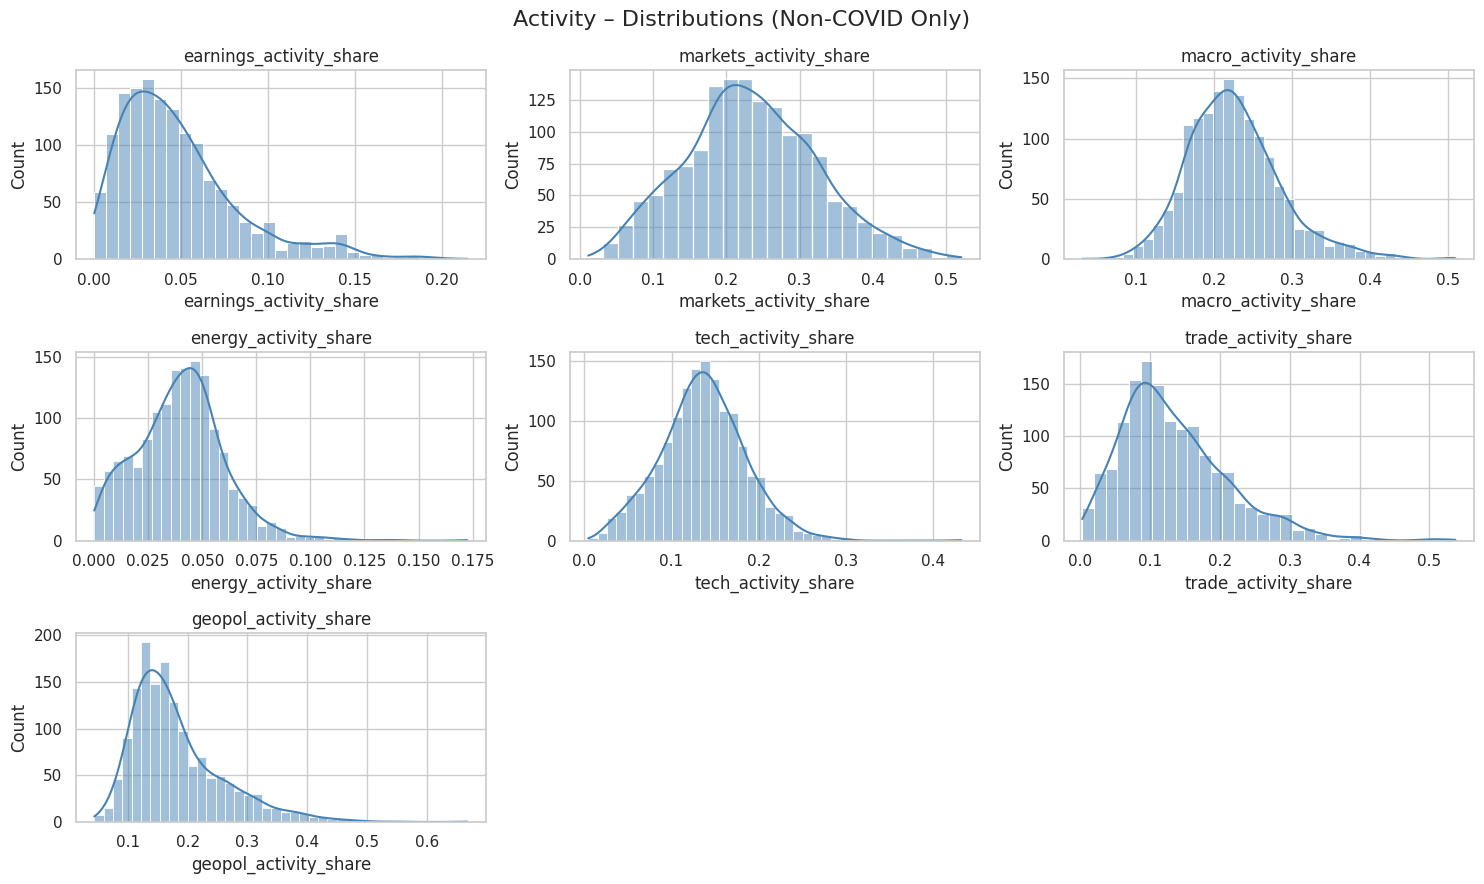

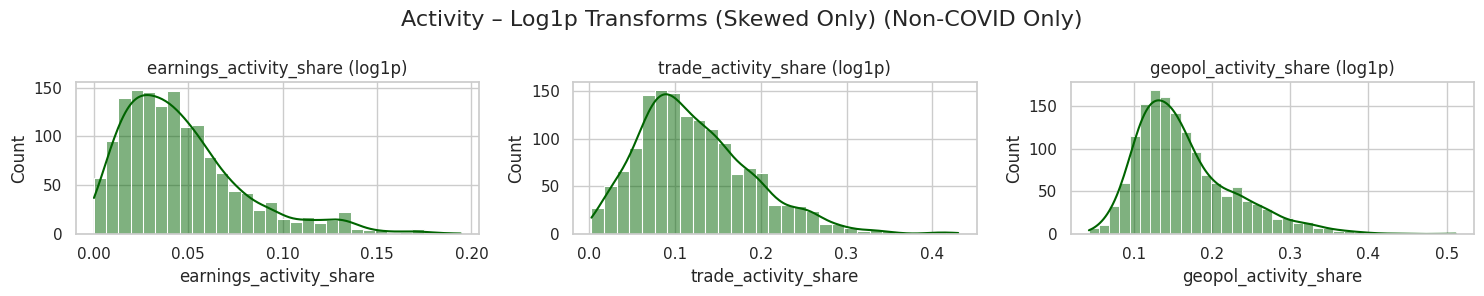

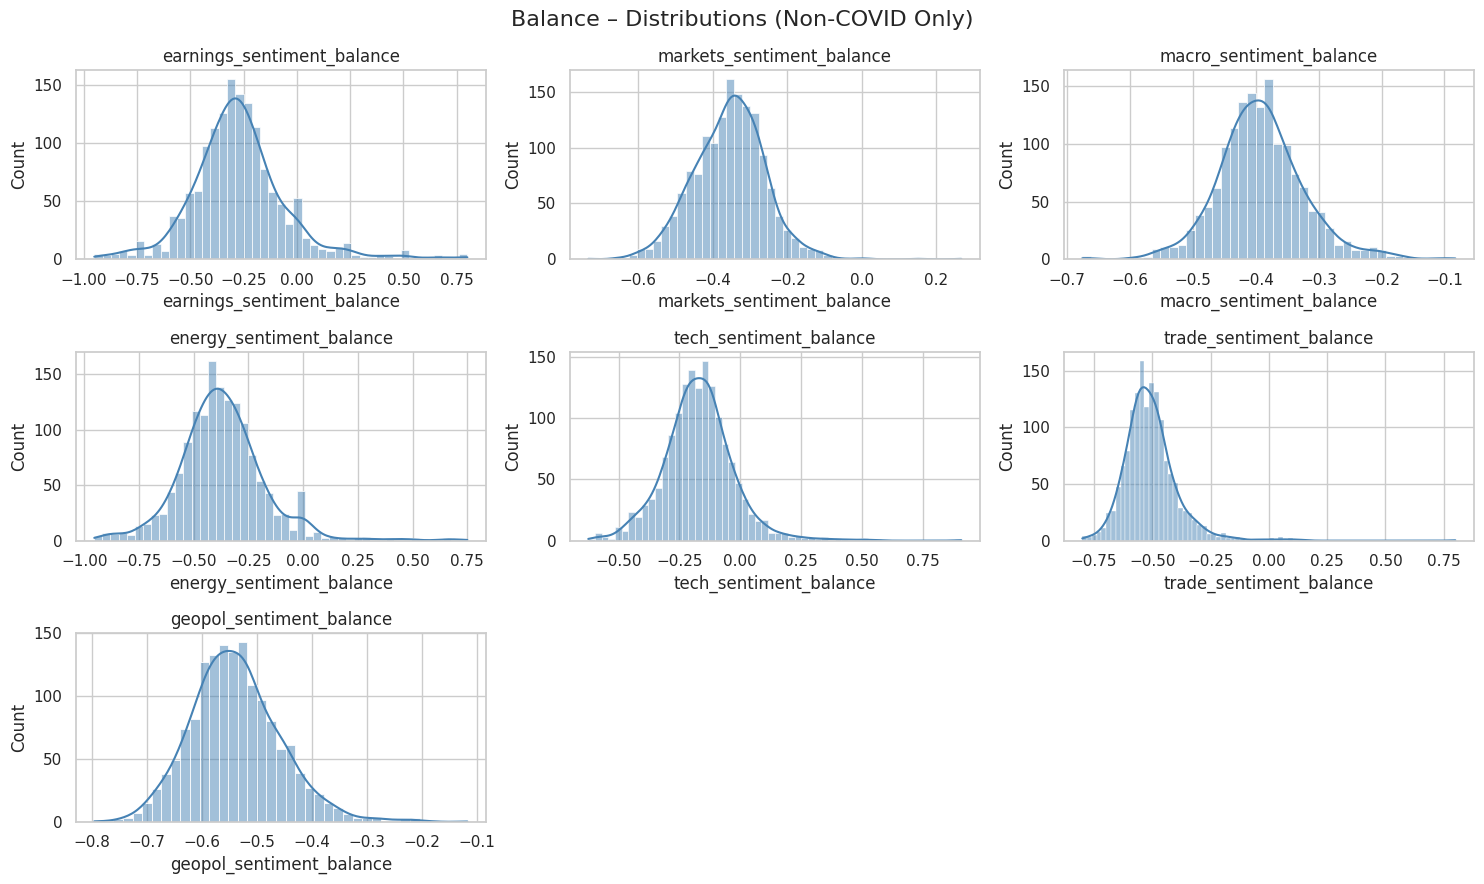

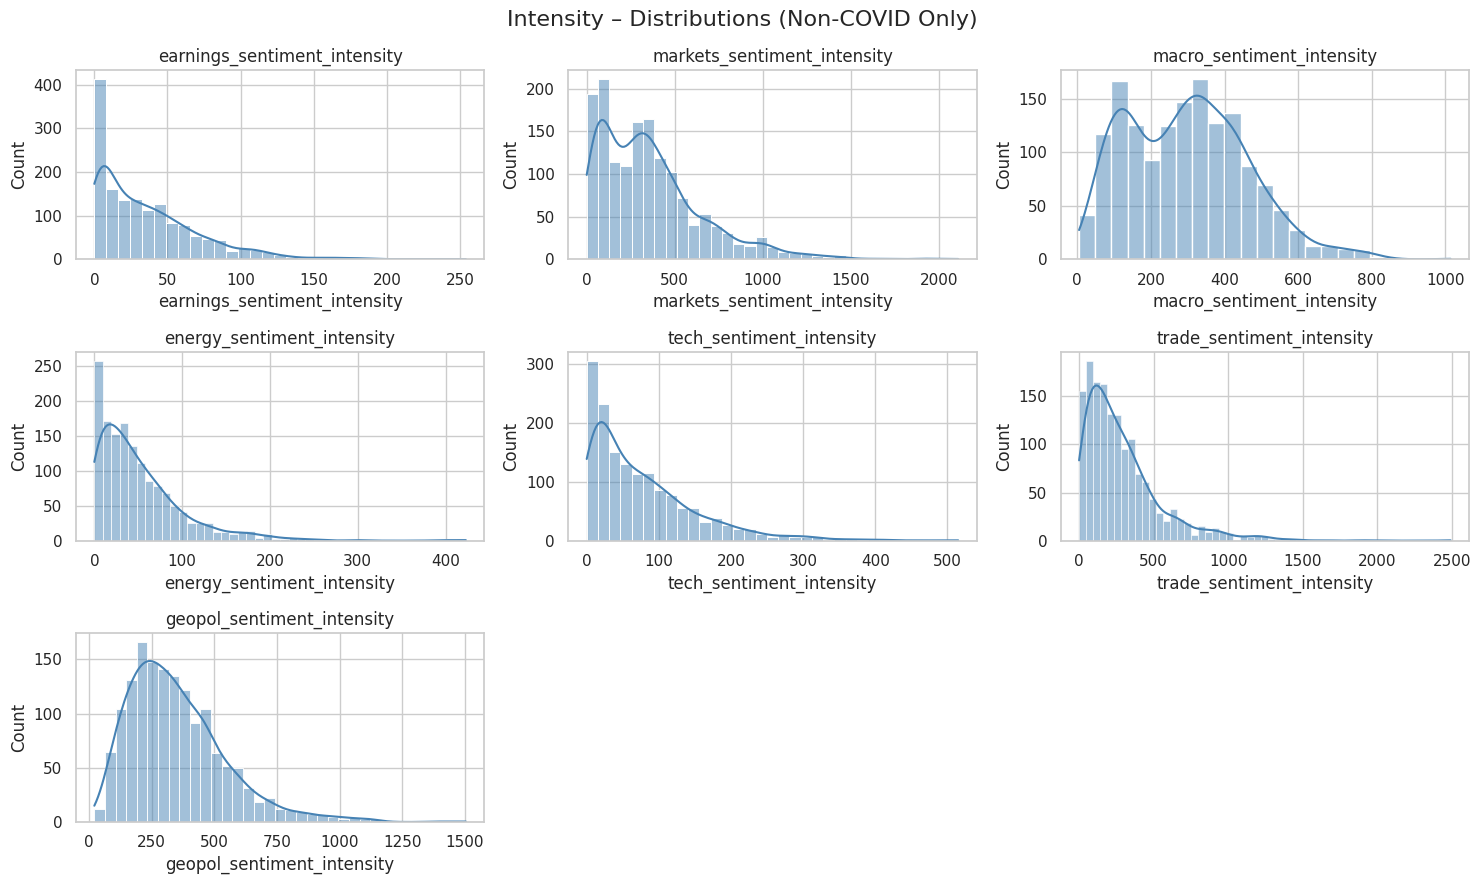

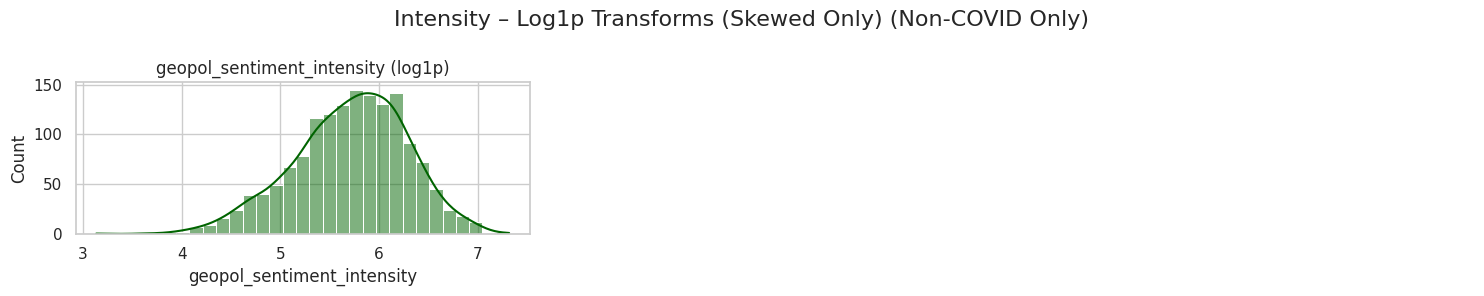

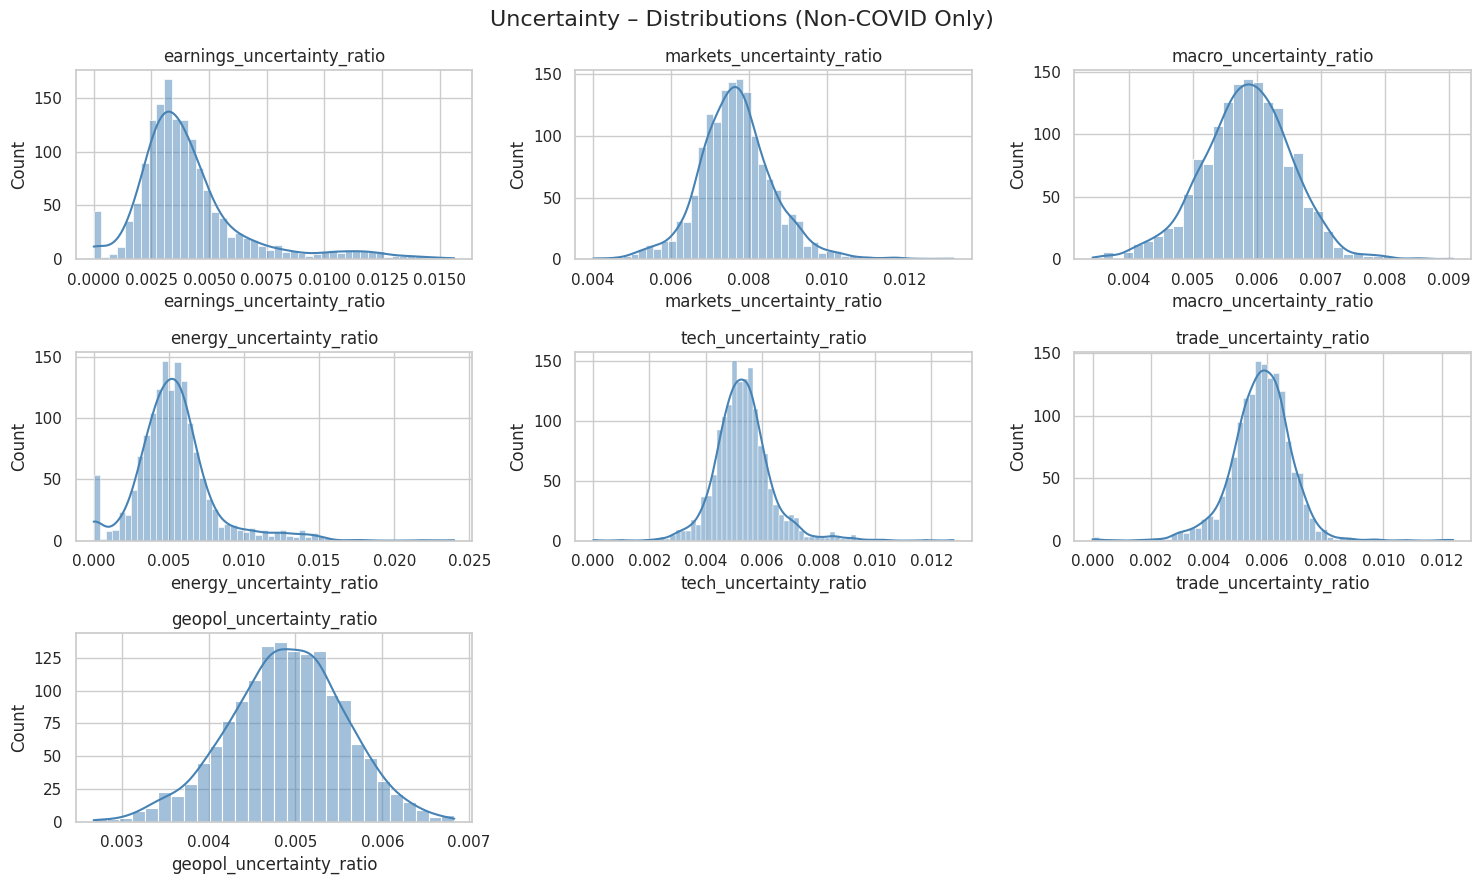

feature        group    mean_all     std_all  \
0        earnings_activity_share     Activity    0.047787    0.034277   
3          energy_activity_share     Activity    0.039981    0.020540   
6          geopol_activity_share     Activity    0.179604    0.077046   
2           macro_activity_share     Activity    0.225561    0.059979   
1         markets_activity_share     Activity    0.237726    0.092486   
4            tech_activity_share     Activity    0.136196    0.047987   
5           trade_activity_share     Activity    0.133137    0.078099   
7     earnings_sentiment_balance      Balance   -0.275625    0.226934   
10      energy_sentiment_balance      Balance   -0.374812    0.198172   
13      geopol_sentiment_balance      Balance   -0.540289    0.082393   
9        macro_sentiment_balance      Balance   -0.393944    0.070782   
8      markets_sentiment_balance      Balance   -0.359051    0.097682   
11        tech_sentiment_balance      Balance   -0.175575    0.145728   
12       trade_sentiment_balance      Balance   -0.508106    0.116637   
14  earnings_sentiment_intensity    Intensity   37.286641   37.075167   
17    energy_sentiment_intensity    Intensity   55.643791   63.446340   
20    geopol_sentiment_intensity    Intensity  351.632968  195.555982   
16     macro_sentiment_intensity    Intensity  306.405666  179.810511   
15   markets_sentiment_intensity    Intensity  384.954926  379.842034   
18      tech_sentiment_intensity    Intensity   80.992273   82.384541   
19     trade_sentiment_intensity    Intensity  285.606705  259.481073   
21    earnings_uncertainty_ratio  Uncertainty    0.004165    0.002488   
24      energy_uncertainty_ratio  Uncertainty    0.005394    0.002617   
27      geopol_uncertainty_ratio  Uncertainty    0.004900    0.000673   
23       macro_uncertainty_ratio  Uncertainty    0.005834    0.000701   
22     markets_uncertainty_ratio  Uncertainty    0.007663    0.000990   
25        tech_uncertainty_ratio  Uncertainty    0.005301    0.001022   
26       trade_uncertainty_ratio  Uncertainty    0.005784    0.001046   

    skew_all   kurt_all  mean_non_covid  std_non_covid  skew_non_covid  \
0   1.408149   5.308098        0.048185       0.034474        1.386237   
3   0.640786   5.047997        0.039739       0.020358        0.596898   
6   1.342303   5.452315        0.181262       0.076786        1.356708   
2   0.733258   4.402611        0.225677       0.060153        0.729112   
1   0.262406   2.789307        0.234096       0.089651        0.230892   
4   0.256437   3.945474        0.136111       0.048385        0.259853   
5   1.115929   4.925468        0.134920       0.077829        1.116274   
7   0.885285   6.325843       -0.271900       0.225618        0.880510   
10  0.861492   6.653757       -0.369954       0.197074        0.865496   
13  0.548995   4.172579       -0.538821       0.082132        0.555218   
9   0.263616   4.372637       -0.391387       0.068905        0.348793   
8   0.162799   4.589692       -0.355862       0.095861        0.190714   
11  0.666139   6.543386       -0.171513       0.144126        0.691719   
12  2.046087  16.581543       -0.506891       0.116388        2.083268   
14  1.562236   6.181145       36.110596      35.053557        1.452516   
17  4.206600  41.432947       51.819092      50.691662        2.171175   
20  1.220968   5.367923      350.431295     195.065554        1.249183   
16  1.030229   5.589689      298.148586     163.554864        0.462359   
15  3.190991  21.300924      357.374096     293.445391        1.415653   
18  1.914028   7.810407       76.736358      74.335093        1.658861   
19  2.059311   9.941765      287.261184     260.941102        2.049128   
21  1.797842   7.128488        0.004156       0.002492        1.792158   
24  1.347941   8.034223        0.005399       0.002633        1.350712   
27 -0.157144   3.050266        0.004900       0.000675       -0.148298   
23 -0.049925   3.720815        0.005836       0.000704   

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis

sns.set(style="whitegrid")

themes = ["earnings", "markets", "macro", "energy", "tech", "trade", "geopol"]

activity_cols = [f"{t}_activity_share" for t in themes] + \
                [f"{t}_activity_share_z7" for t in themes]

sentiment_cols = [f"{t}_sentiment_balance" for t in themes] + \
                  [f"{t}_sentiment_intensity" for t in themes]

uncertainty_cols = [f"{t}_uncertainty_ratio" for t in themes] + \
                   [f"{t}_sentiment_volatility" for t in themes] + \
                   [f"{t}_uncertainty_z7" for t in themes]

def no_z7(cols):
    return [c for c in cols if not c.endswith("_z7")]

feature_groups = {
    "Activity":   no_z7([c for c in activity_cols if "share" in c]),
    "Balance":    no_z7([c for c in sentiment_cols if "balance" in c]),
    "Intensity":  no_z7([c for c in sentiment_cols if "intensity" in c]),
    "Uncertainty": no_z7([c for c in uncertainty_cols if "uncertainty_ratio" in c]),
}

def plot_group_grid(group_name, cols, include_covid=True):
    df_plot = df if include_covid else df[df["is_covid"] == 0]

    n = len(cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows))
    axes = axes.flatten()

    suffix = "" if include_covid else " (Non-COVID Only)"
    fig.suptitle(f"{group_name} – Distributions{suffix}", fontsize=16)

    for ax, col in zip(axes, cols):
        s = df_plot[col].dropna()
        sns.histplot(s, kde=True, ax=ax, color="steelblue")
        ax.set_title(col)

    for ax in axes[len(cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

    skewed = [c for c in cols if df_plot[c].min() > 0 and df_plot[c].skew() > 1]
    if len(skewed) == 0:
        return

    n = len(skewed)
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows))
    axes = axes.flatten()

    fig.suptitle(f"{group_name} – Log1p Transforms (Skewed Only){suffix}", fontsize=16)

    for ax, col in zip(axes, skewed):
        s = df_plot[col].dropna()
        sns.histplot(np.log1p(s), kde=True, ax=ax, color="darkgreen")
        ax.set_title(f"{col} (log1p)")

    for ax in axes[len(skewed):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

for group, cols in feature_groups.items():
    plot_group_grid(group, cols, include_covid=False)

summary_rows = []
for group, cols in feature_groups.items():
    for col in cols:
        s_all = df[col].dropna()
        s_nc = df.loc[df.is_covid == 0, col].dropna()

        summary_rows.append({
            "feature": col,
            "group": group,
            "mean_all": s_all.mean(),
            "std_all": s_all.std(),
            "skew_all": s_all.skew(),
            "kurt_all": kurtosis(s_all, fisher=False),
            "mean_non_covid": s_nc.mean(),
            "std_non_covid": s_nc.std(),
            "skew_non_covid": s_nc.skew(),
            "kurt_non_covid": kurtosis(s_nc, fisher=False),
            "mean_diff": s_all.mean() - s_nc.mean(),
            "std_diff": s_all.std() - s_nc.std(),
            "skew_diff": s_all.skew() - s_nc.skew(),
            "kurt_diff": kurtosis(s_all, fisher=False) - kurtosis(s_nc, fisher=False),
        })

summary_compare = pd.DataFrame(summary_rows).sort_values(["group", "feature"])
summary_compare


**activity**

markets and macro dominate the news cycle, energy, and tech are secondary news. geopol, earnings and trade are event driven, spiking occassionally, as shown by these themes long activity tails and high skew, all themes demonstrate leptokurtic tendancies however market news is the most stable.

**balance**

All themes demonstrate balanced and relatively unskewed sentiment balance excluding trade which appears to be highly event driven potentially reflecting breakthroughs in negotations etc, however all are higly leptokurtic and have very fat tails.
Sentiment polarity generally hovers around “slightly negative,” but occasionally flips sharply upward or downward, producing rare extreme days.

**intensity**

All themes are right skewed with fat tails and extreme events, for instance the energy theme demonstrates a kurtosis scores  > 40, demonstrating rare event. But for themes its generally low-moderate intensity, then extreme spikes what varies is just how extreme these spikes are between themes.

**uncertainty**

The uncertainty ratios show that volatility-sensitive themes are earnings, energy, tech, and trade. These categories have strong right-skew and very fat tails, meaning they occasionally produce sharp bursts of ambiguity during major events. In contrast, macro and geopolitics stay tight and stable, reflecting slow-moving background uncertainty rather than shock risk. This split gives you two regimes: event-driven uncertainty in earnings/energy/tech/trade, and structural uncertainty in macro/geopol.

# **A quick note on COVID**

Roughly the last 20% of the dataset falls in 2020 – peak COVID. Naturally, this period has very different news behaviour, so it's worth asking: how different are the two regimes? Is pre-COVID data still usable? Do the underlying patterns hold up, or does 2020 behave like its own separate world?

To answer this, I compare key distributional properties across COVID and non-COVID periods to see what actually changes, and what stays stable.


In [8]:
from scipy.stats import ks_2samp

final_cols = (
    ["date_key"] +
    [f"{t}_activity_share" for t in themes] +
    [f"{t}_activity_share_z7" for t in themes] +
    [f"{t}_sentiment_balance" for t in themes] +
    [f"{t}_sentiment_intensity" for t in themes] +
    [f"{t}_uncertainty_ratio" for t in themes] +
    [f"{t}_sentiment_volatility" for t in themes] +
    [f"{t}_uncertainty_z7" for t in themes]
)

results = {}

for col in final_cols:
    if col == "date_key": 
        continue
    
    covid = df.loc[df.is_covid == 1, col].dropna()
    noncovid = df.loc[df.is_covid == 0, col].dropna()
    
    stat, p = ks_2samp(covid, noncovid)
    results[col] = {"ks_stat": stat, "p_value": p}

pd.DataFrame(results).T.sort_values("p_value").head(20)


ks_stat       p_value
markets_activity_share         0.833239  9.158289e-24
markets_sentiment_balance      0.769539  7.217319e-20
tech_sentiment_balance         0.742583  3.261670e-18
macro_sentiment_balance        0.715545  1.104007e-16
trade_activity_share           0.710133  6.489917e-16
macro_sentiment_volatility     0.687685  3.135923e-15
energy_sentiment_balance       0.677278  1.040829e-14
energy_sentiment_volatility    0.673511  1.582407e-14
earnings_sentiment_volatility  0.657093  9.346574e-14
markets_sentiment_intensity    0.631698  1.297893e-12
tech_sentiment_volatility      0.626193  2.203700e-12
tech_sentiment_intensity       0.604783  1.739054e-11
markets_sentiment_volatility   0.602226  2.177204e-11
geopol_activity_share          0.595146  8.813179e-11
energy_sentiment_intensity     0.576936  2.132135e-10
macro_sentiment_intensity      0.542468  3.724621e-09
markets_uncertainty_ratio      0.525929  1.348937e-08
geopol_sentiment_volatility    0.510286  4.400685e-08
earnings_sentiment_balance     0.498758  1.007645e-07
earnings_sentiment_intensity   0.471896  6.398381e-07

In [ ]:
#did central tendancy shift?
from scipy.stats import mannwhitneyu

results_u = {}
for col in final_cols:
    if col == "date_key":
        continue
        
    covid = df.loc[df.is_covid == 1, col].dropna()
    noncovid = df.loc[df.is_covid == 0, col].dropna()
    
    stat, p = mannwhitneyu(covid, noncovid, alternative='two-sided')
    results_u[col] = {"mw_stat": stat, "p_value": p}

pd.DataFrame(results_u).T.sort_values("p_value").head(20)

#YES

mw_stat       p_value
markets_activity_share         43757.0  9.103514e-18
macro_sentiment_balance         3264.0  4.735975e-17
markets_sentiment_balance       3756.5  2.466587e-16
energy_sentiment_volatility     4333.0  1.653696e-15
tech_sentiment_balance          4649.0  4.455195e-15
tech_sentiment_volatility       5457.0  5.621791e-14
energy_sentiment_balance        5417.5  6.331263e-14
markets_sentiment_intensity    42867.0  1.571343e-13
trade_activity_share            5290.0  1.984087e-13
tech_sentiment_intensity       42331.0  7.626901e-13
macro_sentiment_volatility      6349.0  8.018194e-13
markets_sentiment_volatility    6978.0  4.847288e-12
geopol_activity_share           6532.0  8.179758e-12
energy_sentiment_intensity     39322.0  5.338032e-10
macro_sentiment_intensity      39509.0  1.508628e-09
markets_uncertainty_ratio      10366.0  2.632871e-08
earnings_sentiment_volatility  10455.0  3.328116e-08
earnings_sentiment_balance     10583.0  5.129155e-08
tech_uncertainty_ratio         11557.5  3.587142e-07
geopol_sentiment_balance       11867.0  6.821504e-07

In [10]:
#VARIANCE?
from scipy.stats import levene

results_lev = {}

for col in final_cols:
    if col == "date_key": 
        continue

    covid = df.loc[df.is_covid == 1, col].dropna()
    noncovid = df.loc[df.is_covid == 0, col].dropna()
    
    stat, p = levene(covid, noncovid)
    results_lev[col] = {"levene_stat": stat, "p_value": p}

pd.DataFrame(results_lev).T.sort_values("p_value").head(20)

#yes


levene_stat       p_value
markets_sentiment_intensity     270.536276  3.706787e-56
energy_sentiment_intensity      217.167790  4.644980e-46
macro_sentiment_intensity       129.756167  6.309802e-29
earnings_sentiment_intensity     73.881531  2.003899e-17
tech_sentiment_intensity         70.680100  9.384492e-17
macro_sentiment_volatility       22.024944  2.928598e-06
trade_activity_share             19.000399  1.394956e-05
energy_sentiment_volatility      17.678004  2.765993e-05
tech_sentiment_volatility        15.020734  1.107760e-04
markets_activity_share           14.106189  1.793161e-04
tech_activity_share              13.501178  2.467175e-04
markets_uncertainty_ratio        11.438731  7.371800e-04
earnings_activity_share          11.410398  7.488566e-04
tech_activity_share_z7           11.200629  8.377440e-04
earnings_sentiment_volatility    11.197131  8.388428e-04
energy_sentiment_balance         10.880754  9.940313e-04
markets_sentiment_volatility     10.787971  1.044422e-03
markets_uncertainty_z7           10.614424  1.146390e-03
trade_activity_share_z7           9.745683  1.831462e-03
markets_sentiment_balance         9.155355  2.520712e-03

## **Did underlying patterns change, or did COVID just push everything to extremes?**

To compare behaviour across regimes, we examined each feature’s distribution with and without COVID years.

The results show a clear pattern:

- The underlying distributional shape is consistent across regimes.  
  Features already exhibit right-skewed, fat-tailed behaviour in non-COVID periods, and this core structure remains the same once COVID days are removed.

- COVID amplifies the existing pattern rather than changing it.  
  During 2020 we see the same right-tailed structure, but pushed to far more extreme values.  
  Variance, tail thickness, and shock intensity all increase, while the basic form of the distribution is preserved.

- KS tests produce very small p-values because they detect tail amplification.  
  Even if the central part of the distribution looks similar, COVID’s extreme right-tail events shift the empirical CDF enough for the KS test to register a significant difference.

Overall, the data-generating process appears stable. Fat right tails were present before COVID and remain after.  
COVID simply pushes this pattern to higher extremes, increasing scale and tail weight without altering the fundamental shape.


### **How does this impact modelling?**

The main issue is that you cannot label COVID as a regime and expect a model to generalise from that. Real markets do not provide crisis flags in advance, so explicitly training on a COVID indicator would not be meaningful out-of-sample.

A better approach is to treat COVID as an example of a high-volatility, high-uncertainty shock rather than a unique regime. The underlying distributional shape stays the same; it is the scale that increases. This means the model should learn from normal periods and still handle shock periods when they occur.

Practically, two things help:

- Train on non-COVID data and test on COVID data to check if the model generalises to extreme conditions.  
- Allow the features themselves to detect shocks, such as spikes in sentiment volatility, uncertainty ratios, or activity dominance, instead of manually flagging crisis periods.

This keeps the modelling realistic: the model learns the stable patterns from normal periods, and the shock signatures during COVID simply appear as extreme values of features the model already understands.


## **Theme-Level Time Series Summary**

The news features show clear structure and stable short-run dynamics. Markets and macro receive the most coverage, while tech, trade and geopolitics fluctuate more and earnings and energy spike around key events. A weekly pattern appears across features, with little monthly structure.

Sentiment balance is consistently negative, while sentiment intensity is skewed and fat-tailed, producing occasional bursts that cluster over several days. Uncertainty ratios are small but informative, with earnings and energy showing the sharpest spikes.

All series are stationary with meaningful short-run autocorrelation, so lagged values are appropriate inputs for modelling. Extreme movements occur on roughly five percent of days, reflecting real events that likely carry predictive signal.

Overall, the features are structured, interpretable and suitable for multivariate modelling.

---
*tests and plots below*

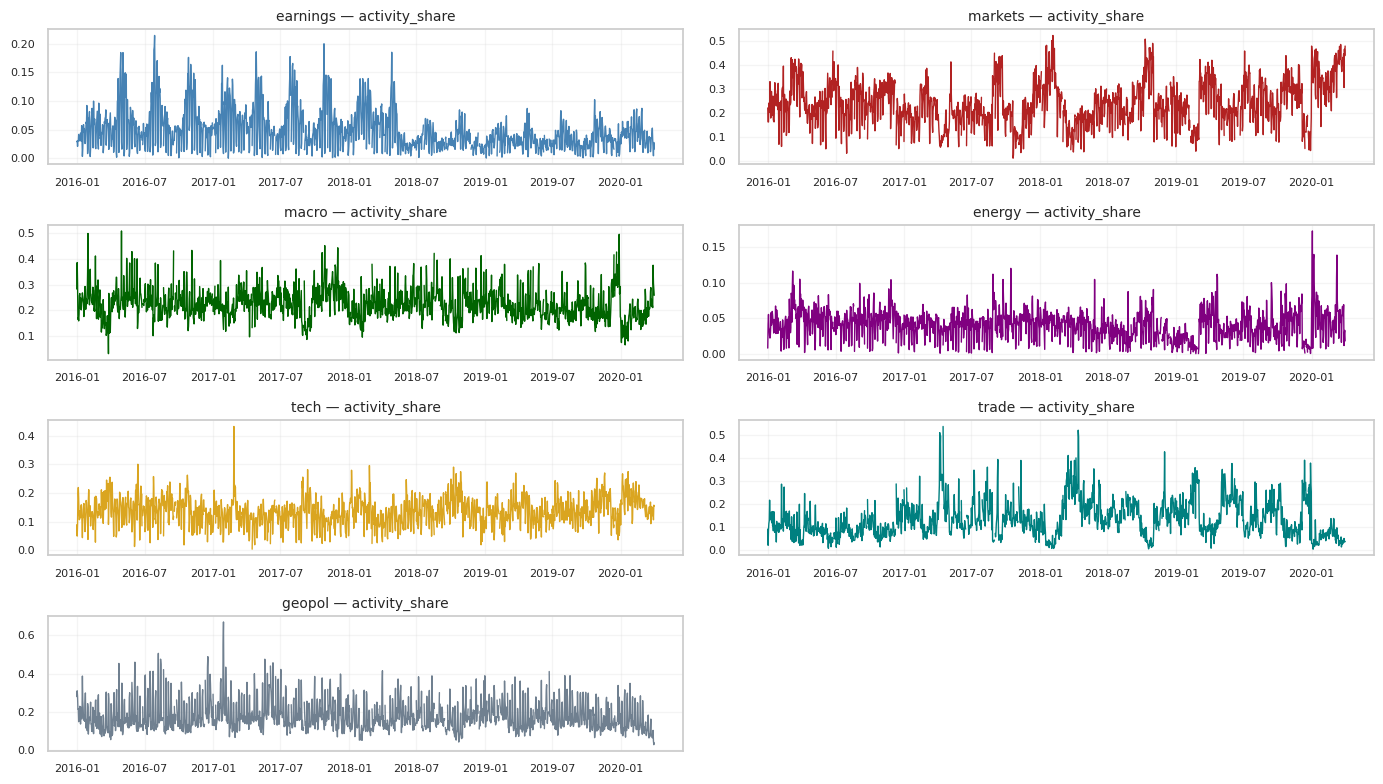

/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]


   theme                 feature     mean       cv  acf_lag7  acf_lag30  pacf_lag1  pacf_lag7        adf_p   kpss_p       ljung_p             verdict
earnings earnings_activity_share 0.046679 0.741907  0.781596  -0.046432   0.655677   0.335886 5.687950e-08 0.010000  0.000000e+00 Probably stationary
 markets  markets_activity_share 0.232215 0.422716  0.649099  -0.061484   0.619709   0.400985 1.128847e-09 0.041229  0.000000e+00 Probably stationary
   macro    macro_activity_share 0.220332 0.310049  0.227634   0.013194   0.271580   0.134535 1.293000e-14 0.010000  4.506924e-96 Probably stationary
  energy   energy_activity_share 0.039054 0.542147  0.412225  -0.080702   0.404411   0.275579 3.089159e-08 0.010000 2.160725e-177 Probably stationary
    tech     tech_activity_share 0.133038 0.388367  0.509767  -0.052582   0.499597   0.276126 4.727147e-07 0.025359 2.480971e-270 Probably stationary
   trade    trade_activity_share 0.130050 0.613196  0.450514   0.105540   0.605934   0.075861 8.2985

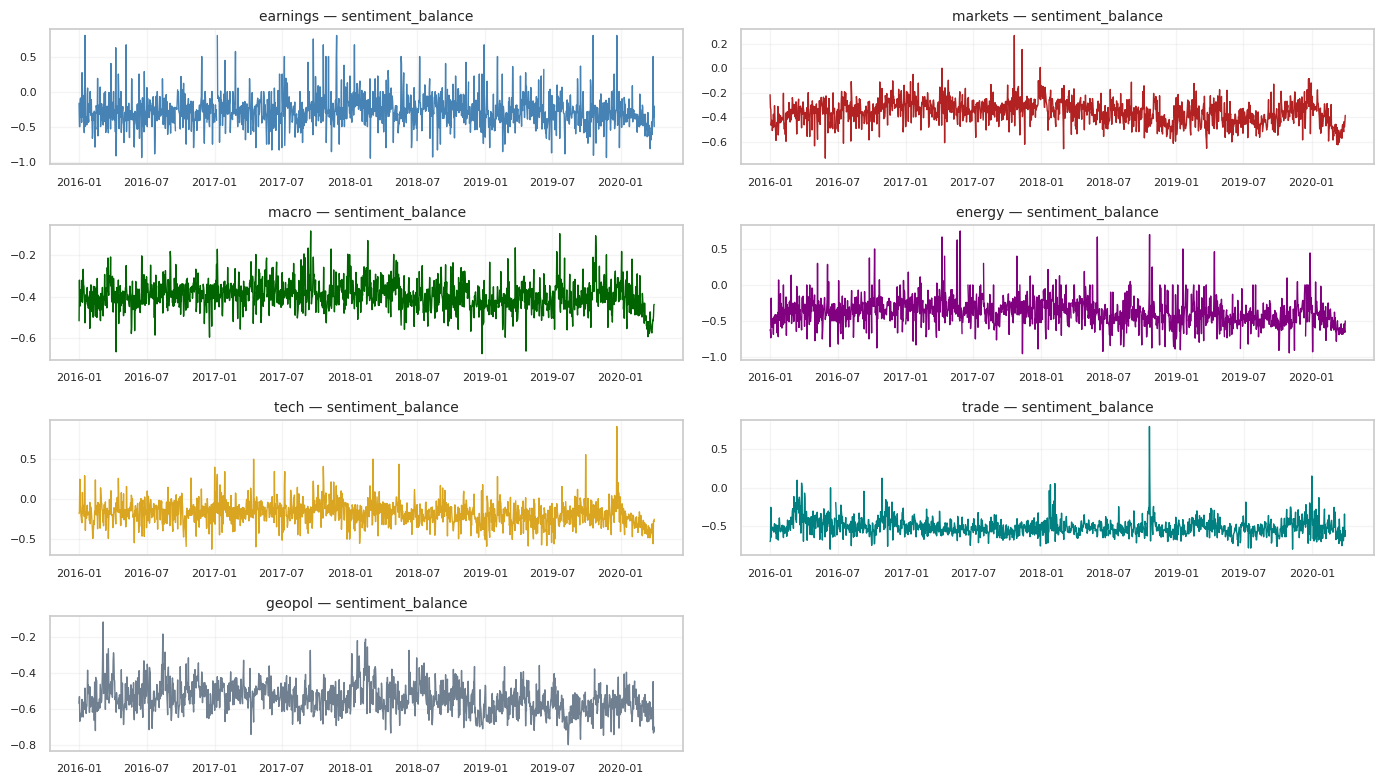

/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/296838

   theme                    feature      mean        cv  acf_lag7  acf_lag30  pacf_lag1  pacf_lag7        adf_p   kpss_p       ljung_p             verdict
earnings earnings_sentiment_balance -0.273673 -0.830583  0.102775   0.013591   0.062703   0.093463 8.516281e-22 0.012333  1.455684e-06 Probably stationary
 markets  markets_sentiment_balance -0.359051 -0.272057  0.304068   0.133084   0.341340   0.118863 4.115293e-04 0.010000 3.403440e-269 Probably stationary
   macro    macro_sentiment_balance -0.393944 -0.179676  0.175850   0.033963   0.267300   0.077662 9.468264e-11 0.010000 2.532814e-107 Probably stationary
  energy   energy_sentiment_balance -0.369261 -0.546619  0.161814   0.115495   0.129554   0.107994 4.863660e-08 0.010000  2.227989e-50 Probably stationary
    tech     tech_sentiment_balance -0.175575 -0.830010  0.173364   0.069560   0.250328   0.100633 3.431031e-12 0.010000  2.858887e-82 Probably stationary
   trade    trade_sentiment_balance -0.507452 -0.232493  0.212962   0.

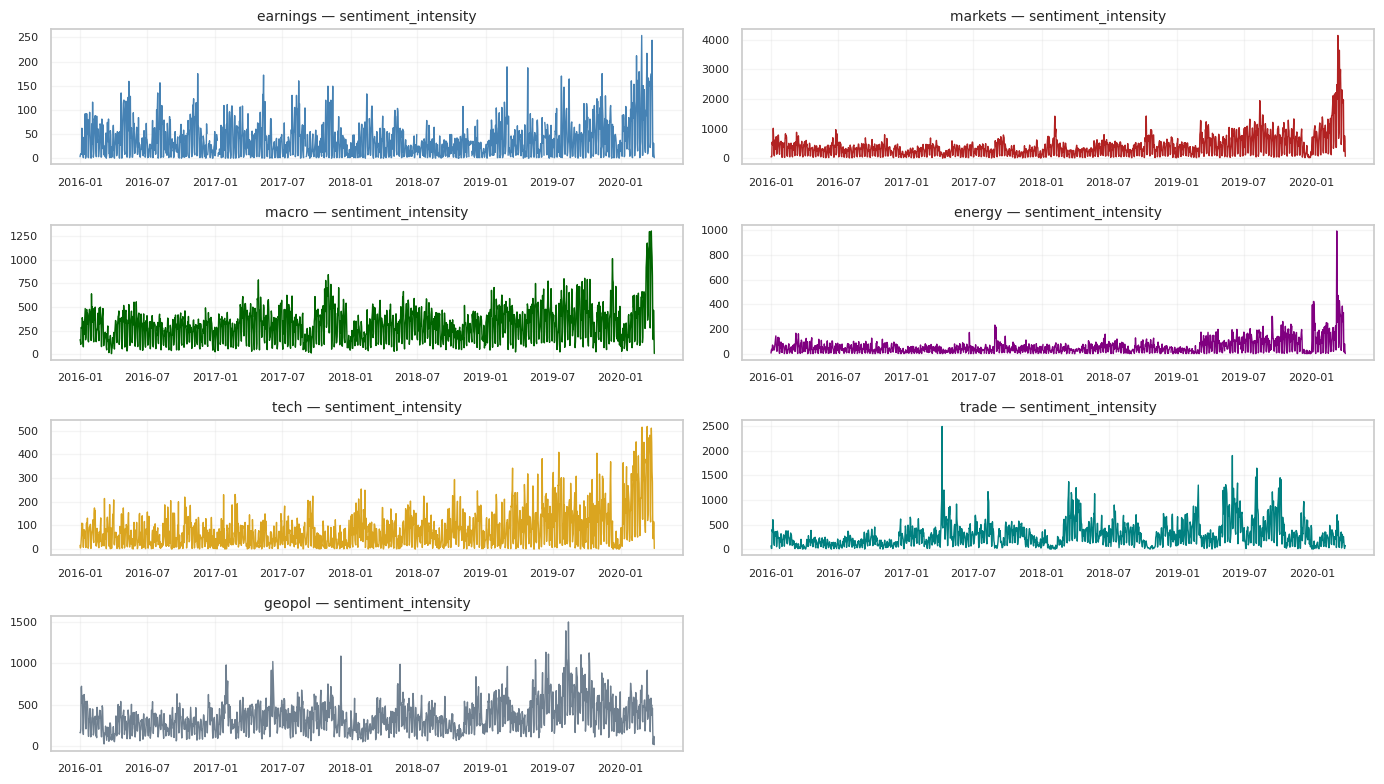

/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/296838

   theme                      feature       mean       cv  acf_lag7  acf_lag30  pacf_lag1  pacf_lag7        adf_p  kpss_p  ljung_p             verdict
earnings earnings_sentiment_intensity  37.022537 1.001437  0.610938  -0.072020   0.489968   0.362396 2.256797e-05    0.01      0.0 Probably stationary
 markets  markets_sentiment_intensity 384.954926 0.986718  0.790894   0.080616   0.668739   0.419023 1.380098e-06    0.01      0.0 Probably stationary
   macro    macro_sentiment_intensity 306.405666 0.586838  0.733225  -0.105038   0.563154   0.435163 8.020946e-08    0.01      0.0 Probably stationary
  energy   energy_sentiment_intensity  54.819704 1.155285  0.592675   0.088937   0.563008   0.340725 1.053609e-02    0.01      0.0 Probably stationary
    tech     tech_sentiment_intensity  80.992273 1.017190  0.614664   0.110285   0.551843   0.360103 2.053688e-02    0.01      0.0 Probably stationary
   trade    trade_sentiment_intensity 285.238892 0.909820  0.627577   0.077668   0.666455   0.

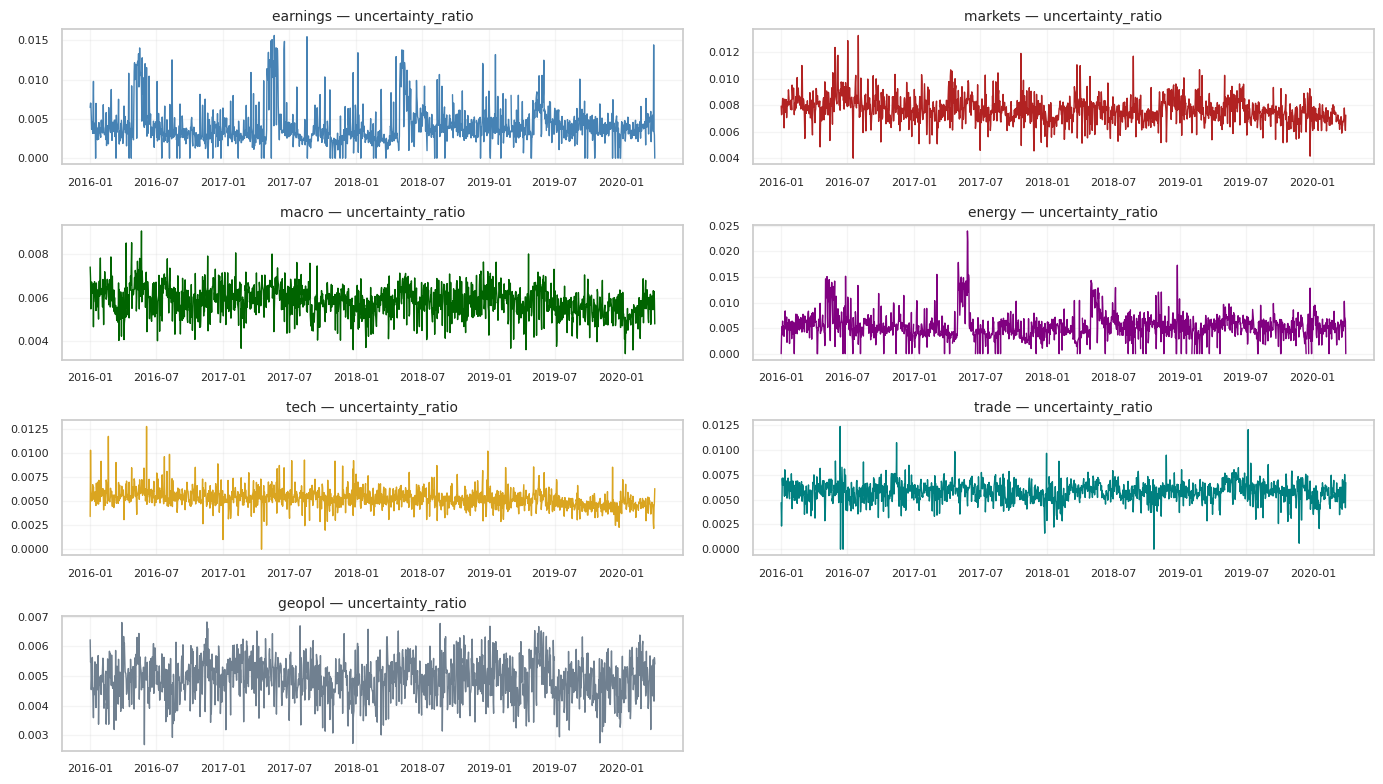

/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]
/tmp/ipykernel_321538/296838

   theme                    feature     mean       cv  acf_lag7  acf_lag30  pacf_lag1  pacf_lag7        adf_p  kpss_p       ljung_p             verdict
earnings earnings_uncertainty_ratio 0.004136 0.605214  0.437025   0.087133   0.441308   0.198889 1.074870e-07    0.10  0.000000e+00 Probably stationary
 markets  markets_uncertainty_ratio 0.007663 0.129202  0.218922   0.101834   0.300904   0.103843 2.310385e-08    0.01 7.092698e-150 Probably stationary
   macro    macro_uncertainty_ratio 0.005834 0.120085  0.295612   0.079982   0.211021   0.211035 4.184583e-06    0.01 2.483637e-127 Probably stationary
  energy   energy_uncertainty_ratio 0.005314 0.503959  0.348183  -0.005893   0.446104   0.125843 3.345849e-09    0.10  0.000000e+00 Probably stationary
    tech     tech_uncertainty_ratio 0.005301 0.192688  0.189193   0.104863   0.118394   0.131629 9.102425e-03    0.01  2.523755e-58 Probably stationary
   trade    trade_uncertainty_ratio 0.005777 0.184524  0.166578   0.043290   0.163663   

/tmp/ipykernel_321538/2968380475.py:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, nlags="auto")[1]


theme                     feature      mean        cv  acf_lag7  \
0  earnings  earnings_uncertainty_ratio  0.004136  0.605214  0.437025   
1   markets   markets_uncertainty_ratio  0.007663  0.129202  0.218922   
2     macro     macro_uncertainty_ratio  0.005834  0.120085  0.295612   
3    energy    energy_uncertainty_ratio  0.005314  0.503959  0.348183   
4      tech      tech_uncertainty_ratio  0.005301  0.192688  0.189193   
5     trade     trade_uncertainty_ratio  0.005777  0.184524  0.166578   
6    geopol    geopol_uncertainty_ratio  0.004900  0.137322  0.213279   

   acf_lag30  pacf_lag1  pacf_lag7         adf_p  kpss_p        ljung_p  \
0   0.087133   0.441308   0.198889  1.074870e-07    0.10   0.000000e+00   
1   0.101834   0.300904   0.103843  2.310385e-08    0.01  7.092698e-150   
2   0.079982   0.211021   0.211035  4.184583e-06    0.01  2.483637e-127   
3  -0.005893   0.446104   0.125843  3.345849e-09    0.10   0.000000e+00   
4   0.104863   0.118394   0.131629  9.102425e-03    0.01   2.523755e-58   
5   0.043290   0.163663   0.121553  4.086658e-17    0.10   1.699333e-37   
6  -0.020222   0.237767   0.166559  1.593553e-06    0.10   9.604178e-49   

               verdict  
0  Probably stationary  
1  Probably stationary  
2  Probably stationary  
3  Probably stationary  
4  Probably stationary  
5  Probably stationary  
6  Probably stationary

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

sns.set(style="whitegrid")

themes = ["earnings", "markets", "macro", "energy", "tech", "trade", "geopol"]
colors = ["steelblue", "firebrick", "darkgreen", "purple", "goldenrod", "teal", "slategray"]


def run_feature_diagnostics(variable):
    n = len(themes)
    ncols = 2
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8))
    axes = axes.flatten()

    for ax, t, c in zip(axes, themes, colors):
        col = f"{t}_{variable}"
        s = df[col]
        ax.plot(df["date_key"], s, color=c, linewidth=1)
        ax.set_title(f"{t} — {variable}", fontsize=10)
        ax.grid(alpha=0.2)
        ax.tick_params(labelsize=8)

    for ax in axes[len(themes):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

    rows = []

    for t in themes:
        col = f"{t}_{variable}"
        s = df[col].fillna(0)

        mean = s.mean()
        std = s.std()
        cv = std / (mean + 1e-6)

        ac_vals = acf(s, nlags=30, fft=False)
        pac_vals = pacf(s, nlags=10)

        ac7, ac30 = ac_vals[7], ac_vals[30]
        pac1, pac7 = pac_vals[1], pac_vals[7]

        adf_p = adfuller(s)[1]
        try:
            kpss_p = kpss(s, nlags="auto")[1]
        except:
            kpss_p = np.nan

        lj_p = acorr_ljungbox(s, lags=[10], return_df=True)["lb_pvalue"].iloc[0]

        adf_flag = adf_p < 0.05
        kpss_flag = (kpss_p < 0.05) if not np.isnan(kpss_p) else None

        if adf_flag and kpss_flag is False:
            verdict = "Stationary"
        elif adf_flag and kpss_flag is True:
            verdict = "Mixed"
        elif not adf_flag and kpss_flag is True:
            verdict = "Non-stationary"
        else:
            verdict = "Probably stationary" if adf_p < 0.1 else "Unclear"

        rows.append([
            t, col, mean, cv, ac7, ac30, pac1, pac7,
            adf_p, kpss_p, lj_p, verdict
        ])

    df_diag = pd.DataFrame(rows, columns=[
        "theme", "feature", "mean", "cv",
        "acf_lag7", "acf_lag30", "pacf_lag1", "pacf_lag7",
        "adf_p", "kpss_p", "ljung_p", "verdict"
    ])

    print(df_diag.to_string(index=False))

    return df_diag

run_feature_diagnostics("activity_share")
run_feature_diagnostics("sentiment_balance")
run_feature_diagnostics("sentiment_intensity")
run_feature_diagnostics("uncertainty_ratio")


### Activity Summary


The features show a clear weekly pattern but no monthly seasonality. All series are stationary, with short-term dependence evident from autocorrelation and Ljung–Box tests. Distributions are skewed and fat-tailed, reflecting occasional spikes rather than smooth variation. Themes differ in persistence, with earnings and markets more regular and macro or geopolitics more event-driven.

For modelling, this means lagged values are informative, rolling windows are justified, and the data contains structured variation suitable for supervised prediction.

### Sentiment Balance Summary

Sentiment balance is negative on average across all themes and shows moderate volatility with occasional sharp shifts. Weekly persistence is mild, strongest in markets and geopolitics, and essentially absent in earnings. All series are stationary and show short-run autocorrelation but no monthly structure. Spikes are rare but present.

For modelling, balance behaves as a mean-reverting, weakly persistent signal with occasional shocks, suitable for short-lag features and not requiring long-term adjustments.

### Sentiment Intensity Summary

Sentiment intensity is high-variance across all themes, with strong short-run autocorrelation and moderate persistence but no meaningful long-horizon structure. All series appear stationary despite heavy volatility, and KPSS warnings indicate extremely small p-values rather than true non-stationarity. Earnings, tech, and energy show the most erratic short spikes, while markets and geopolitics display smoother but persistent fluctuations.

For modelling, sentiment intensity behaves as a stationary, shock-driven signal with strong local dependence. It supports short-lag and volatility-sensitive features without requiring differencing or trend correction.

### Uncertainty Ratio Summary

Uncertainty ratios are small in absolute terms, so variation matters more than level. Earnings and energy show the highest volatility and the sharpest bursts, while other themes are smoother and more stable. Ratios are weakly autocorrelated over a week and largely stationary, indicating short-run clustering rather than long trends. Spikes are rare but meaningful given the low baseline.

For modelling, earnings and energy uncertainty should provide the strongest signals, while other themes add steady incremental information. Lagged uncertainty features are justified due to short-run persistence.



 Within-Theme Correlations 


 Earnings 



 Markets 



 Macro 



 Energy 



 Tech 



 Trade 



 Geopol 



 Across-Theme Correlations (Sentiment) 




 Across-Theme Correlations (Activity Share) 




 Across-Theme Correlations (Uncertainty Ratio) 



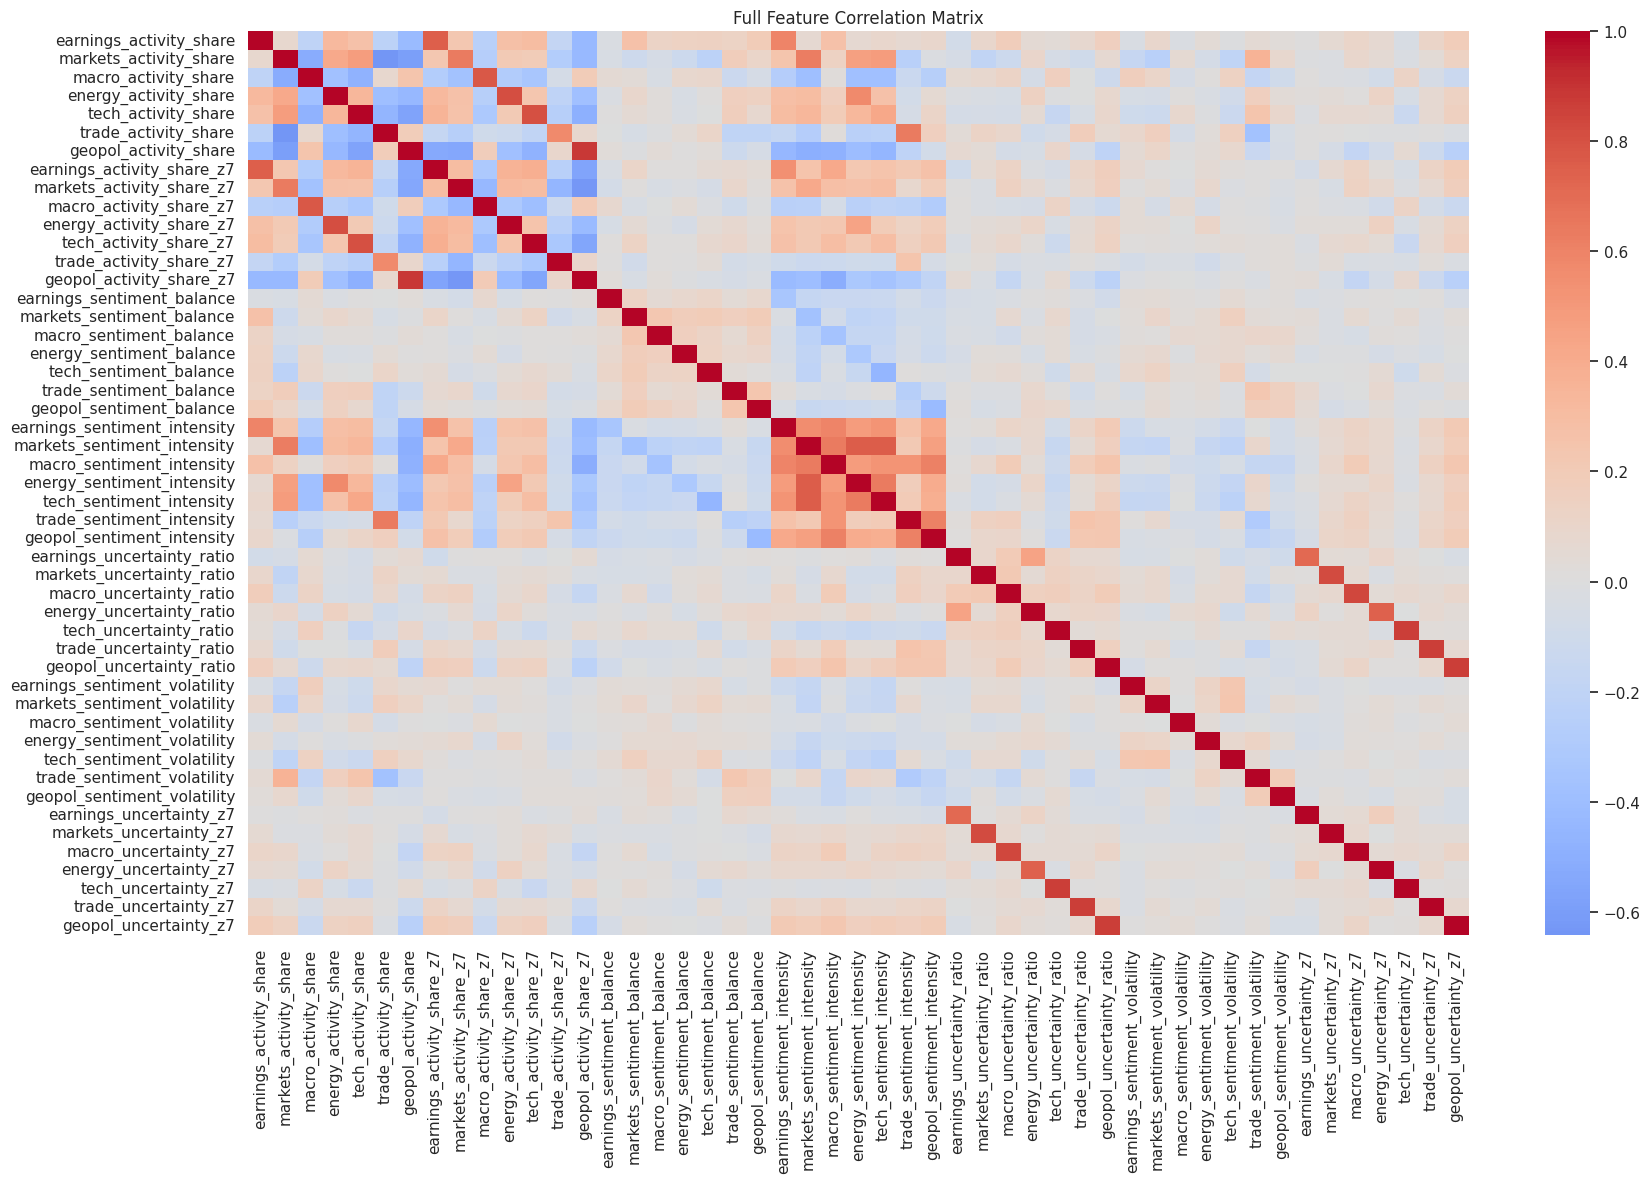

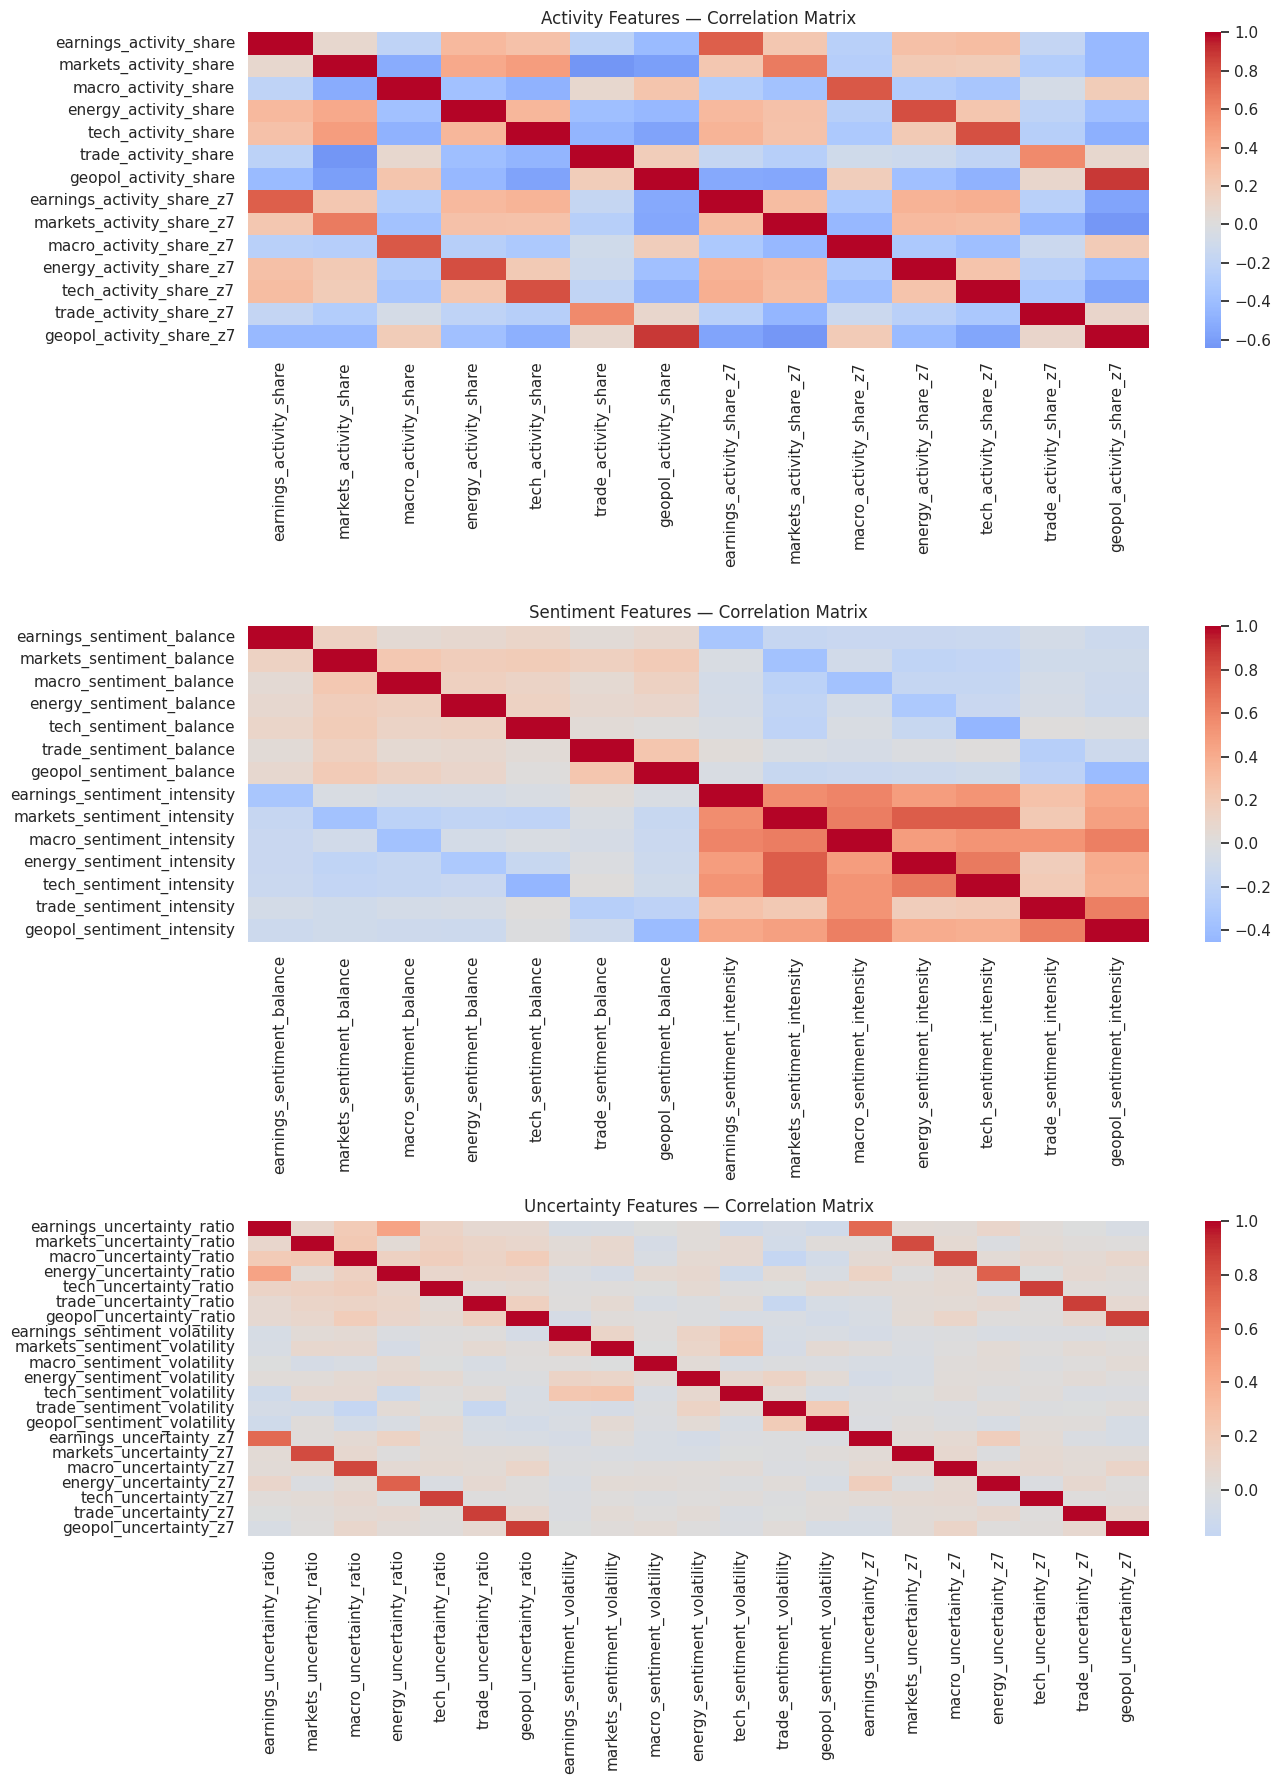

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

themes = ["earnings", "markets", "macro", "energy", "tech", "trade", "geopol"]
activity_cols = [f"{t}_activity_share" for t in themes] + \
                [f"{t}_activity_share_z7" for t in themes]

sentiment_cols = [f"{t}_sentiment_balance" for t in themes] + \
                 [f"{t}_sentiment_intensity" for t in themes]

uncertainty_cols = [f"{t}_uncertainty_ratio" for t in themes] + \
                   [f"{t}_sentiment_volatility" for t in themes] + \
                   [f"{t}_uncertainty_z7" for t in themes]

#intra-theme hms
print("\n Within-Theme Correlations \n")
for t in themes:
    cols = [
        f"{t}_activity_share",
        f"{t}_activity_share_z7",
        f"{t}_sentiment_balance",
        f"{t}_sentiment_intensity",
        f"{t}_uncertainty_ratio",
        f"{t}_sentiment_volatility",
        f"{t}_uncertainty_z7",
    ]
    sub = df[cols].corr()
    print(f"\n {t.capitalize()} ")
    display(sub.style.background_gradient(cmap="coolwarm"))

#inter theme hms
print("\n Across-Theme Correlations (Sentiment) \n")
sent_cross = df[[f"{t}_sentiment_balance" for t in themes]].corr()
display(sent_cross.style.background_gradient(cmap="coolwarm"))

print("\n Across-Theme Correlations (Activity Share) \n")
act_cross = df[[f"{t}_activity_share" for t in themes]].corr()
display(act_cross.style.background_gradient(cmap="coolwarm"))

print("\n Across-Theme Correlations (Uncertainty Ratio) \n")
unc_cross = df[[f"{t}_uncertainty_ratio" for t in themes]].corr()
display(unc_cross.style.background_gradient(cmap="coolwarm"))

#full heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(df[activity_cols + sentiment_cols + uncertainty_cols].corr(),
            cmap="coolwarm", center=0)
plt.title("Full Feature Correlation Matrix")
plt.tight_layout()
plt.show()

#feature group heatmaps
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

sns.heatmap(df[activity_cols].corr(), cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Activity Features — Correlation Matrix")

sns.heatmap(df[sentiment_cols].corr(), cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Sentiment Features — Correlation Matrix")



sns.heatmap(df[uncertainty_cols].corr(), cmap="coolwarm", center=0, ax=axes[2])
axes[2].set_title("Uncertainty Features — Correlation Matrix")

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np

themes = ["earnings", "markets", "macro", "energy", "tech", "trade", "geopol"]

activity_cols = [f"{t}_activity_share" for t in themes] + \
                [f"{t}_activity_share_z7" for t in themes]

sentiment_cols = [f"{t}_sentiment_balance" for t in themes] + \
                 [f"{t}_sentiment_intensity" for t in themes]

uncertainty_cols = [f"{t}_uncertainty_ratio" for t in themes] + \
                   [f"{t}_sentiment_volatility" for t in themes] + \
                   [f"{t}_uncertainty_z7" for t in themes]

print("Within-Theme Correlations (Raw Numbers)")
for t in themes:
    cols = [
        f"{t}_activity_share",
        f"{t}_activity_share_z7",
        f"{t}_sentiment_balance",
        f"{t}_sentiment_intensity",
        f"{t}_uncertainty_ratio",
        f"{t}_sentiment_volatility",
        f"{t}_uncertainty_z7",
    ]
    sub = df[cols].corr()
    print(t.upper())
    print(sub.to_string())
    print()

print("Across-Theme Correlations: Sentiment Balance")
sent_cross = df[[f"{t}_sentiment_balance" for t in themes]].corr()
print(sent_cross.to_string())
print()

print("Across-Theme Correlations: Activity Share")
act_cross = df[[f"{t}_activity_share" for t in themes]].corr()
print(act_cross.to_string())
print()

print("Across-Theme Correlations: Uncertainty Ratio")
unc_cross = df[[f"{t}_uncertainty_ratio" for t in themes]].corr()
print(unc_cross.to_string())


Within-Theme Correlations (Raw Numbers)
EARNINGS
                               earnings_activity_share  earnings_activity_share_z7  earnings_sentiment_balance  earnings_sentiment_intensity  earnings_uncertainty_ratio  earnings_sentiment_volatility  earnings_uncertainty_z7
earnings_activity_share                       1.000000                    0.752063                   -0.030202                      0.591356                   -0.078914                      -0.033857                 0.003242
earnings_activity_share_z7                    0.752063                    1.000000                   -0.037113                      0.539692                   -0.100018                       0.069453                -0.070804
earnings_sentiment_balance                   -0.030202                   -0.037113                    1.000000                     -0.337960                   -0.060066                       0.035483                -0.033232
earnings_sentiment_intensity                  0.591

### **Correlation Analysis Summary**

The news features capture different dimensions of information. Activity, sentiment, and uncertainty show only weak to moderate correlations, indicating that they are not redundant. Strong relationships appear only where expected (for example, activity with its z-score, or uncertainty with its z-score). Across themes, correlations remain low, confirming that macro, tech, energy, trade, and geopolitical news move largely independently.

For modelling, this means the feature set is not collinear, each block contributes distinct signal, and all features can be included without collapsing into a single underlying factor.


### **Across-Theme Correlation Summary**

Sentiment balance correlations are very low across themes, showing that each theme captures its own tone rather than reflecting a single “global sentiment” effect.

Activity share correlations are strongly negative, which follows naturally from attention being a zero-sum quantity: when one theme receives more coverage, others receive less.

Uncertainty ratios show moderate positive correlations, consistent with broad market stress spilling across themes, but not in a uniform way.

Overall, the three feature groups behave differently and contribute non-overlapping information relevant for volatility modelling.


### **Within-Theme Correlation Summary**

Activity and intensity form the strongest internal pair, reflecting higher sentiment amplitude on days with higher coverage.  
Balance is mostly independent from both and reflects tone rather than volume.  
Activity z-scores capture surprise shifts in attention without duplicating raw activity.  
Uncertainty ratios and their z-scores move together but reflect different scales.  
Sentiment volatility is weakly correlated with other features and mainly represents instability, not tone or attention.


### **Modelling Notes**

Activity and intensity provide a shock-related signal.  
Balance and uncertainty supply orthogonal sentiment dimensions.  
Sentiment volatility captures regime instability rather than direction.  

Overall multicollinearity is low, and the full feature set can be used without structural redundancy.


# **Bivariate EDA**

#### **1. Understanding the Target**

The analysis is ticker-agnostic: selecting any symbol in yfinance will change the specific numbers in the EDA, but the broader patterns remain the same. Volatility, news intensity, uncertainty, and attention shifts follow similar structural behaviours across most assets, even though their magnitudes differ. This allows the modelling framework to generalise across tickers while still adapting to asset-specific dynamics.


In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRADING_DAYS = 252
WINDOW = 5
SPIKE_Z = 1.5


def load_market_data(ticker: str, start, end) -> pd.DataFrame:
    df = yf.download(ticker, start=start, end=end, interval="1d")

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns]

    df = (
        df.reset_index()
          .rename(columns={"Date": "date_key"})
          .assign(date_key=lambda x: pd.to_datetime(x["date_key"]))
    )

    rename_map = {}
    for col in df.columns:
        if "Close" in col:  rename_map[col] = "Close"
        if "Open" in col:   rename_map[col] = "Open"
        if "High" in col:   rename_map[col] = "High"
        if "Low" in col:    rename_map[col] = "Low"
        if "Volume" in col: rename_map[col] = "Volume"

    df = df.rename(columns=rename_map)
    return df[["date_key", "Open", "High", "Low", "Close", "Volume"]]

def add_volatility_targets(df_mkt: pd.DataFrame) -> pd.DataFrame:
    df = df_mkt.copy()

    df["ret"] = df["Close"].pct_change()

    # rolling annualized vol
    df["vol"] = df["ret"].rolling(WINDOW).std() * np.sqrt(TRADING_DAYS)
    df["log_vol"] = np.log1p(df["vol"])

    mean_vol = df["vol"].mean()
    sd_vol = df["vol"].std()
    threshold = mean_vol + SPIKE_Z * sd_vol

    df["vol_spike"] = (df["vol"].shift(-1) > threshold).astype(int)

    return df



# 3. MERGE NEWS + MARKET

def merge_news_market(df_news: pd.DataFrame, df_mkt: pd.DataFrame) -> pd.DataFrame:
    merged = (
        df_mkt.merge(df_news, on="date_key", how="left")
              .sort_values("date_key")
              .reset_index(drop=True)
    )

    news_cols = df_news.columns.drop("date_key")
    merged[news_cols] = merged[news_cols].fillna(0)

    merged["covid_dummy"] = (merged["date_key"] >= pd.Timestamp("2020-02-15")).astype(int)

    return merged.dropna(subset=["vol"])


def add_lags(df: pd.DataFrame) -> pd.DataFrame:
    df_l = df.copy()

    market_cols = ["Close", "ret", "vol", "log_vol"]
    intensity_cols = [c for c in df.columns if "sentiment_intensity" in c]
    balance_cols = [c for c in df.columns if "sentiment_balance" in c]

    for col in market_cols:
        df_l[f"{col}_lag1"] = df_l[col].shift(1)
        df_l[f"{col}_lag3"] = df_l[col].shift(3)

    for col in intensity_cols:
        df_l[f"{col}_lag1"] = df_l[col].shift(1)
        df_l[f"{col}_lag3"] = df_l[col].shift(3)

    for col in balance_cols:
        df_l[f"{col}_lag1"] = df_l[col].shift(1)

    return df_l.dropna().reset_index(drop=True)



def add_rv_targets(df: pd.DataFrame) -> pd.DataFrame:
    df_rv = df.copy()

    # absolute return for realized vol
    df_rv["ret_abs"] = df_rv["ret"].abs()

    # RV1, RV3, RV5
    df_rv["rv1"] = df_rv["ret_abs"].shift(-1)
    df_rv["rv3"] = df_rv["ret_abs"].rolling(3).sum().shift(-3)
    df_rv["rv5"] = df_rv["ret_abs"].rolling(5).sum().shift(-5)

    return df_rv.dropna(subset=["rv1", "rv3", "rv5"]).reset_index(drop=True)


def build_full_modelling_df(df_news: pd.DataFrame, ticker: str):
    # 1. Load market data
    start_date = df_news["date_key"].min()
    end_date   = df_news["date_key"].max()

    df_mkt = load_market_data(ticker, start=start_date, end=end_date)

    # 2. Add volatility spike targets
    df_mkt = add_volatility_targets(df_mkt)

    # 3. Merge with news
    df_model = merge_news_market(df_news, df_mkt)

    # 4. Add lags
    df_model = add_lags(df_model)

    # 5. Add RV targets
    df_model = add_rv_targets(df_model)

    return df_model

df_news = load_daily_features()
df_model = build_full_modelling_df(df_news, ticker="SPY")

print(df_model.shape)
df_model.head()



[*********************100%***********************]  1 of 1 completed

(1055, 94)


date_key        Open        High         Low       Close     Volume  \
0 2016-01-14  161.125604  164.279255  159.519024  163.148697  240795600   
1 2016-01-15  158.762476  160.454053  157.699923  159.646515  324846400   
2 2016-01-19  161.474113  161.601614  158.277944  159.859024  195244400   
3 2016-01-20  157.283433  159.383040  153.874766  157.810455  286547800   
4 2016-01-21  158.286487  160.547591  156.951913  158.694504  195772900   

        ret       vol   log_vol  vol_spike  ...  \
0  0.016417  0.257967  0.229497          0  ...   
1 -0.021466  0.289551  0.254294          0  ...   
2  0.001331  0.289945  0.254600          0  ...   
3 -0.012815  0.271996  0.240588          0  ...   
4  0.005602  0.238617  0.213996          0  ...   

   markets_sentiment_balance_lag1  macro_sentiment_balance_lag1  \
0                       -0.305777                     -0.341034   
1                       -0.385328                     -0.350042   
2                       -0.475722                     -0.402328   
3                       -0.442973                     -0.434464   
4                       -0.470838                     -0.390184   

   energy_sentiment_balance_lag1  tech_sentiment_balance_lag1  \
0                      -0.434457                    -0.086486   
1                      -0.535316                    -0.077572   
2                      -0.411483                    -0.216524   
3                      -0.447674                    -0.177316   
4                      -0.665000                    -0.161232   

   trade_sentiment_balance_lag1  geopol_sentiment_balance_lag1   ret_abs  \
0                     -0.466398                      -0.561439  0.016417   
1                     -0.551938                      -0.602610  0.021466   
2                     -0.535885                      -0.567021  0.001331   
3                     -0.526899                      -0.572827  0.012815   
4                     -0.584184                      -0.623272  0.005602   

        rv1       rv3       rv5  
0  0.021466  0.035612  0.061729  
1  0.001331  0.019748  0.055379  
2  0.012815  0.038932  0.067691  
3  0.005602  0.041233  0.065760  
4  0.020515  0.049274  0.065367  

[5 rows x 94 columns]

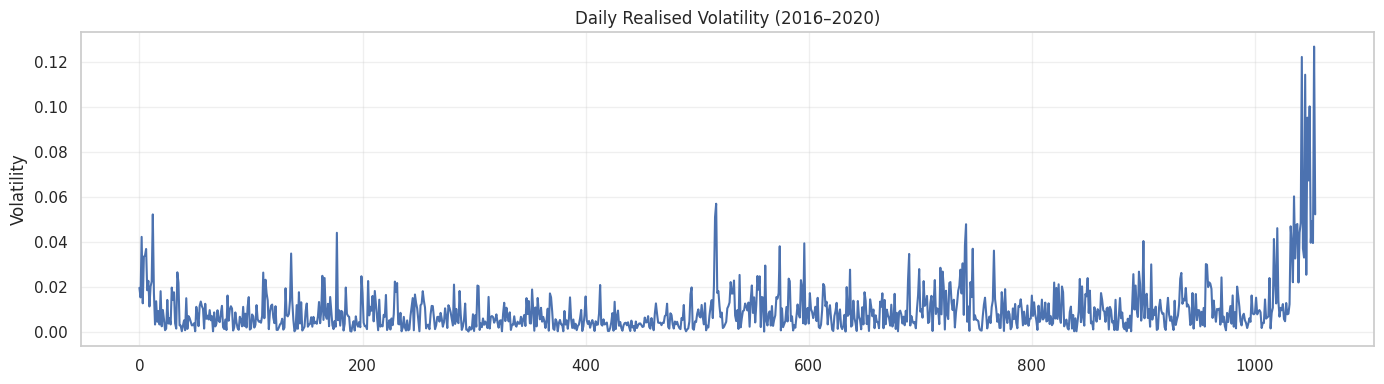

In [20]:
df_model["rv1"].dropna().plot(
    figsize=(14, 4),
    title="Daily Realised Volatility (2016–2020)",
    ylabel="Volatility"
)
plt.grid(alpha=0.3)
plt.tight_layout()



classic volatility clustering behaviour is shown for any ticker you put in here

Text(0.5, 1.0, 'RVolatility Distribution for SPY')

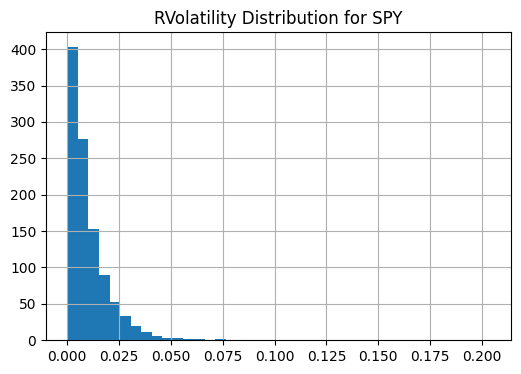

In [60]:
df_model["rv1"].hist(bins=40, figsize=(6,4))
plt.title("RVolatility Distribution for SPY")


The realised volatility distribution is strongly right-skewed, with most days showing very low volatility and a long tail of larger volatility events. This reflects the classic empirical behaviour of financial volatility:

many calm days, tightly clustered near zero,

fewer moderate moves,

and very few extreme spikes far out in the tail.

In terms of classification this could be challenging due to heavy class imbalanances

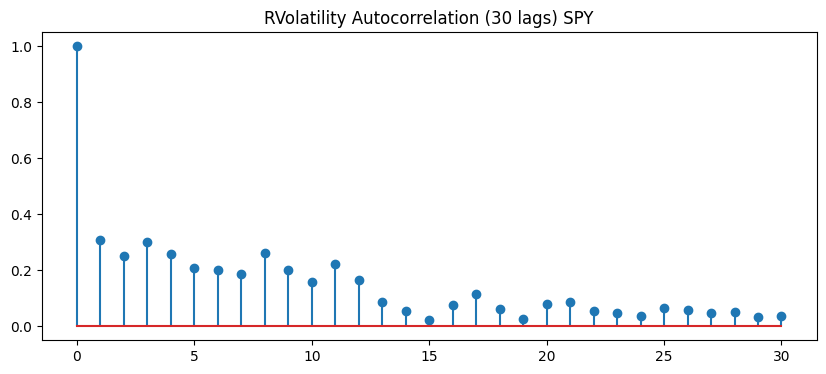

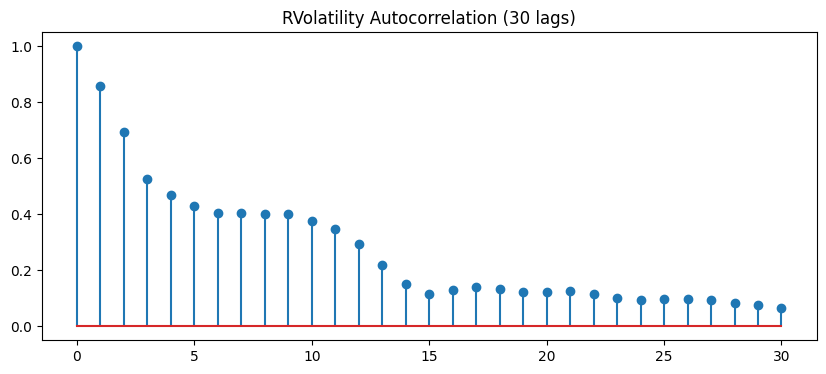

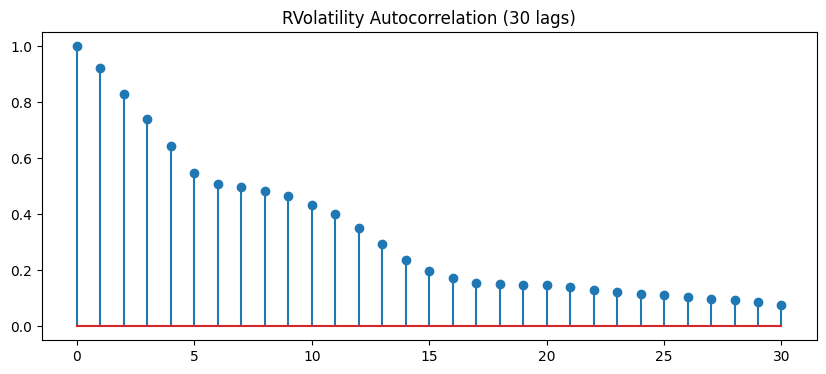

In [61]:
from statsmodels.tsa.stattools import acf

acf_vals = acf(df_model["rv1"], nlags=30, fft=True)
    # no lags for activity shares, z-scores, uncertainty, sentiment_volatility, covid_dummy
plt.figure(figsize=(10,4))
plt.stem(acf_vals)
plt.title("RVolatility Autocorrelation (30 lags) SPY")
plt.show()

from statsmodels.tsa.stattools import acf

acf_vals = acf(df_model["rv3"], nlags=30, fft=True)

plt.figure(figsize=(10,4))
plt.stem(acf_vals)
plt.title("RVolatility Autocorrelation (30 lags)")
plt.show()

from statsmodels.tsa.stattools import acf

acf_vals = acf(df_model["rv5"], nlags=30, fft=True)

plt.figure(figsize=(10,4))
plt.stem(acf_vals)
plt.title("RVolatility Autocorrelation (30 lags)")
plt.show()



### **Autocorrelation Patterns Across Realised Volatility Horizons**

A clear pattern emerges when comparing realised volatility at different horizons (RV₁, RV₃, RV₅): autocorrelation becomes stronger and more persistent as the time horizon increases.

- **RV₁ (1-day RV)** shows strong short-term dependence, but autocorrelation decays relatively quickly.  
- **RV₃** smooths returns across multiple days, so noise cancels out and persistence rises.  
- **RV₅** behaves like a slow-moving process, with long autocorrelation tails and strong overlap between windows.

This effect is mechanical: multi-day realised volatility windows overlap heavily.  
For example:

\[
RV_{5,t} = |r_t| + |r_{t-1}| + |r_{t-2}| + |r_{t-3}| + |r_{t-4}|
\]

Tomorrow’s RV₅ shares four out of five terms with today’s, which builds autocorrelation directly into the series.

---

### **Implications for Predictability From News**

As the horizon increases, realised volatility becomes increasingly driven by its own past:

- the series becomes smoother and slower-moving  
- autoregressive structure explains more variation  
- shocks fade more gradually  

This reduces the relative informativeness of news.

News primarily influences immediate volatility reactions, not the slow-moving dynamics produced by overlapping windows.  
Thus:

> Short-horizon RV (like RV₁) offers the best opportunity for news features to add predictive value.  
> Longer horizons (RV₃, RV₅) are dominated by persistence, leaving less room for new information to matter.

This aligns with the modelling results: news contributes most at 1-day horizons, and its incremental impact declines as the window expands.


#### **2: Target Feature Correlation**



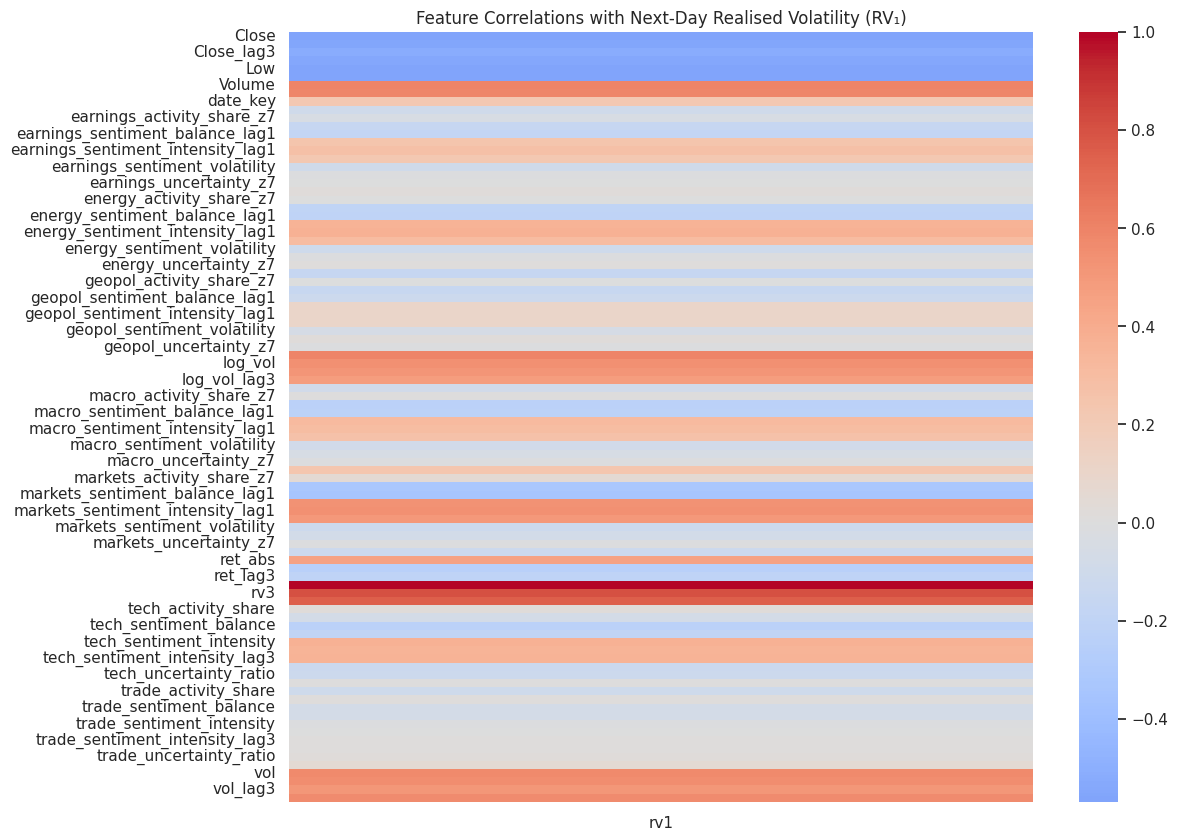

In [ ]:


# Compute correlations
corr = df_model.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr[["rv1"]].sort_index(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlations with Next-Day Realised Volatility (RV₁)")
plt.show()


In [64]:
#top cors

corr = df_model.corr()

#news stuff only
news_cols = [
    c for c in df_model.columns
    if any(k in c for k in [
        "activity_share",
        "sentiment_balance",
        "sentiment_intensity",
        "uncertainty",
        "sentiment_volatility"
    ])
]

#abs cor
corr_rv1_news = (
    corr.loc[news_cols, "rv1"]
        .abs()
        .sort_values(ascending=False)
)

print("Top news predictors of RV₁:")
display(corr_rv1_news.head(50))


Top news predictors of RV₁:


markets_sentiment_intensity          0.584720
markets_sentiment_intensity_lag1     0.551019
markets_sentiment_intensity_lag3     0.478415
markets_sentiment_balance            0.403533
energy_sentiment_intensity           0.378022
energy_sentiment_intensity_lag1      0.363537
tech_sentiment_intensity             0.356443
markets_sentiment_balance_lag1       0.351799
energy_sentiment_intensity_lag3      0.347403
tech_sentiment_intensity_lag1        0.343703
tech_sentiment_intensity_lag3        0.336387
macro_sentiment_intensity            0.304556
macro_sentiment_intensity_lag1       0.274471
tech_sentiment_balance               0.248662
macro_sentiment_balance              0.246768
earnings_sentiment_intensity_lag1    0.240814
macro_sentiment_intensity_lag3       0.240494
markets_activity_share               0.237608
macro_sentiment_balance_lag1         0.229196
energy_sentiment_balance             0.224322
tech_sentiment_balance_lag1          0.222317
earnings_sentiment_intensity      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression

#targ
y = df_model["rv1"].values

#base features
drop_cols = [
    "date_key", "vol", "vol_t1", "spike_t1", "vol_spike",
    "Open", "High", "Low", "Close", "Volume", "ret",
    "log_vol", "rv1", "rv3", "rv5", "covid_dummy", "is_covid", 
]

baseline_news = [
    c for c in df_model.columns
    if c not in drop_cols]

X = df_model[baseline_news].fillna(0)

# mutual information scores
mi = mutual_info_regression(X, y, random_state=0)

mi_table = (
    pd.DataFrame({"feature": baseline_news, "MI_score": mi})
      .sort_values("MI_score", ascending=False)
      .reset_index(drop=True)
)

mi_table.head(50)


feature  MI_score
0                            ret_lag3  0.106736
1           markets_sentiment_balance  0.099170
2                            vol_lag1  0.093334
3                            vol_lag3  0.092181
4                        log_vol_lag3  0.084172
5         tech_sentiment_balance_lag1  0.079242
6                        log_vol_lag1  0.075399
7         markets_sentiment_intensity  0.069602
8    markets_sentiment_intensity_lag3  0.061217
9      markets_sentiment_balance_lag1  0.058652
10   markets_sentiment_intensity_lag1  0.057593
11          trade_sentiment_intensity  0.052423
12                           ret_lag1  0.052157
13          macro_sentiment_intensity  0.051598
14                         Close_lag3  0.049188
15           energy_activity_share_z7  0.042301
16                            ret_abs  0.042291
17         energy_sentiment_intensity  0.039736
18            earnings_uncertainty_z7  0.037052
19         earnings_activity_share_z7  0.035973
20          markets_uncertainty_ratio  0.035434
21      geopol_sentiment_balance_lag1  0.033205
22         geopol_sentiment_intensity  0.031334
23               trade_activity_share  0.024128
24               macro_activity_share  0.023809
25                         Close_lag1  0.020432
26           energy_uncertainty_ratio  0.018898
27         trade_sentiment_volatility  0.017447
28              energy_activity_share  0.015074
29     trade_sentiment_intensity_lag1  0.014773
30               macro_uncertainty_z7  0.014377
31           geopol_activity_share_z7  0.013465
32  earnings_sentiment_intensity_lag1  0.012566
33           tech_sentiment_intensity  0.012017
34           energy_sentiment_balance  0.011926
35             markets_activity_share  0.011705
36         earnings_uncertainty_ratio  0.011043
37            trade_activity_share_z7  0.009986
38             tech_activity_share_z7  0.009934
39    energy_sentiment_intensity_lag1  0.009624
40       earnings_sentiment_intensity  0.009424
41       macro_sentiment_balance_lag1  0.009097
42        energy_sentiment_volatility  0.009072
43  earnings_sentiment_intensity_lag3  0.006444
44              geopol_uncertainty_z7  0.006045
45                tech_activity_share  0.005116
46                tech_uncertainty_z7  0.004650
47     macro_sentiment_intensity_lag3  0.002692
48      earnings_sentiment_volatility  0.001893
49           geopol_uncertainty_ratio  0.001295

### **Mutual Information: News Features vs. Next-Day Realised Volatility (RV₁)**

The MI scores highlight which news variables share any statistical dependence with RV₁. A few clear patterns emerge:

**Market-centred sentiment dominates.**  
*markets_sentiment_balance* and *markets_sentiment_intensity* are by far the strongest signals. RV₁ responds most to news explicitly framed around market conditions.

**Macro, trade, and energy themes provide secondary signal.**  
Sentiment intensities in these categories show moderate MI values, suggesting they matter but contribute less than core market sentiment.

**Extreme bursts of coverage carry information.**  
Activity-share z-scores (e.g., *energy_activity_share_z7*, *earnings_activity_share_z7*) appear because they capture nonlinear effects when media attention clusters sharply around a theme.

**Uncertainty features are weak but non-zero.**  
Uncertainty ratios and related metrics hold small MI scores, indicating limited but detectable influence.

**Most features contribute no signal.**  
More than half of the variables have MI ≈ 0, showing no measurable dependency with RV₁. This aligns with why large feature sets often failed to improve models.

Overall, only a narrow set of news features mainly market-oriented sentiment and occasional bursts of thematic coverage—show meaningful association with next-day realised volatility.


## **Testing Casuality and lead/lag in our features**

In [6]:
import pandas as pd
import numpy as np

def cross_corr(x, y, max_lag=10):
    x = (x - x.mean()) / x.std()
    y = (y - y.mean()) / y.std()
    
    vals = []
    for lag in range(max_lag + 1):
        if lag == 0:
            vals.append(np.corrcoef(x, y)[0,1])
        else:
            vals.append(np.corrcoef(x[:-lag], y[lag:])[0,1])
    return vals

# target
y = df_model["rv1"].values

#only news
exclude = {"date_key", "Open", "High", "Low", "Close", "Volume",
           "ret", "vol", "log_vol", "vol_spike", "spike_t1",
           "vol_t1", "covid_dummy", "is_covid", "rv3", "rv5", "rv1", "vol_lag1", "log_vol_lag1", "log_vol_lag3",
           "ret_lag1", "ret_lag3", "Close_lag1", "Close_lag3"}

news_features = [c for c in df_model.columns if c not in exclude]

results = []

for feat in news_features:
    x = df_model[feat].values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    ccf = cross_corr(x_clean, y_clean, max_lag=10)
    peak_idx = int(np.argmax(ccf))
    peak_val = float(ccf[peak_idx])

    if peak_idx == 0:
        signal_type = "contemporaneous"
    else:
        signal_type = f"leads by {peak_idx}"

    results.append({
        "feature": feat,
        "peak_corr": peak_val,
        "peak_lag": peak_idx,
        "signal_type": signal_type
    })

df_ccf = pd.DataFrame(results).sort_values("peak_corr", ascending=False)
df_ccf.head(50)


feature  peak_corr  peak_lag      signal_type
22        markets_sentiment_intensity   0.541500         1       leads by 1
52   markets_sentiment_intensity_lag1   0.540790         0  contemporaneous
49                           vol_lag3   0.514698         0  contemporaneous
53   markets_sentiment_intensity_lag3   0.502258         0  contemporaneous
71                            ret_abs   0.487224         1       leads by 1
56    energy_sentiment_intensity_lag1   0.393852         1       leads by 1
24         energy_sentiment_intensity   0.393662         2       leads by 2
25           tech_sentiment_intensity   0.375302         2       leads by 2
58      tech_sentiment_intensity_lag1   0.374843         1       leads by 1
57    energy_sentiment_intensity_lag3   0.370979         3       leads by 3
59      tech_sentiment_intensity_lag3   0.364810         0  contemporaneous
23          macro_sentiment_intensity   0.315407         0  contemporaneous
54     macro_sentiment_intensity_lag1   0.301020         0  contemporaneous
21       earnings_sentiment_intensity   0.272295         1       leads by 1
50  earnings_sentiment_intensity_lag1   0.271543         0  contemporaneous
55     macro_sentiment_intensity_lag3   0.270187         0  contemporaneous
51  earnings_sentiment_intensity_lag3   0.242138         1       leads by 1
1              markets_activity_share   0.234032         0  contemporaneous
63    geopol_sentiment_intensity_lag3   0.124530         3       leads by 3
62    geopol_sentiment_intensity_lag1   0.122840         5       leads by 5
27         geopol_sentiment_intensity   0.121598         6       leads by 6
4                 tech_activity_share   0.097091         9       leads by 9
47               trade_uncertainty_z7   0.072184         3       leads by 3
8           markets_activity_share_z7   0.071955        10      leads by 10
34           geopol_uncertainty_ratio   0.067488         3       leads by 3
48              geopol_uncertainty_z7   0.065211         5       leads by 5
46                tech_uncertainty_z7   0.063114         5       leads by 5
3               energy_activity_share   0.062551         6       leads by 6
13           geopol_activity_share_z7   0.057144         6       leads by 6
40         trade_sentiment_volatility   0.054095         7       leads by 7
10           energy_activity_share_z7   0.045595        10      leads by 10
9             macro_activity_share_z7   0.043236         5       leads by 5
45              energy_uncertainty_z7   0.034952         3       leads by 3
44               macro_uncertainty_z7   0.033937         3       leads by 3
43             markets_uncertainty_z7   0.030126         8       leads by 8
42            earnings_uncertainty_z7   0.029814         3       leads by 3
12            trade_activity_share_z7   0.029203         2       leads by 2
26          trade_sentiment_intensity   0.014916         6       leads by 6
60     trade_sentiment_intensity_lag1   0.014772         5       leads by 5
33            trade_uncertainty_ratio   0.014619         0  contemporaneous
61     trade_sentiment_intensity_lag3   0.014051         3       leads by 3
28         earnings_uncertainty_ratio   0.004787         3       leads by 3
31           energy_uncertainty_ratio   0.003141         3       leads by 3
41        geopol_sentiment_volatility  -0.017079         8       leads by 8
30            macro_uncertainty_ratio  -0.019499         3       leads by 3
11             tech_activity_share_z7  -0.022246         3       leads by 3
69       trade_sentiment_balance_lag1  -0.023462         7       leads by 7
19            trade_sentiment_balance  -0.023719         8       leads by 8
7          earnings_activity_share_z7  -0.027148        10      leads by 10
64    earnings_sentiment_balance_lag1  -0.038250        10      leads by 10

# Cross-Correlation Insights for RV₁

The cross-correlation analysis shows a clear and intuitive structure. Realized volatility one day ahead is driven mainly by same-day news shocks. Markets, macro, and energy sentiment intensities all show their strongest correlation at lag 0, meaning volatility reacts immediately when news arrives. This matches standard volatility–news dynamics where information hits prices and volatility in the same session.

A smaller group of themes shows weak leading behaviour. Energy and earnings sentiment, along with uncertainty ratios, display mild peaks at lag 1. These likely reflect short spillover effects from events such as OPEC announcements or earnings cycles that continue influencing markets the next day. These signals exist but are too small to materially improve predictive models.

Several features appear to “lead” volatility by 6–10 days, but these are structural correlations rather than true predictors. Slow-moving cycles in tech news flow and overall market conditions align mechanically with volatility’s own cycles, creating spurious leads with no forecasting value. Their behaviour does not translate into meaningful model performance, as later tests confirm.

Overall, RV₁ is primarily contemporaneous: most of the usable information is embedded in today’s news intensity, and predictive power decays rapidly with horizon. Only limited short-term spillover exists, and long-lag peaks should be interpreted as artefacts rather than signals.


In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

def granger_news(df, target="rv1", maxlag=7, alpha=0.05):
    blocklist = {
        "date_key", "Open", "High", "Low", "Close", "Volume",
        "ret", "vol", "log_vol", "vol_spike", "spike_t1",
        "vol_t1", "covid_dummy", "is_covid", "rv3", "rv5",
        "ret_abs", target
    }

    # allow lagged news features now
    predictors = [
        c for c in df.columns
        if c not in blocklist
    ]

    results = []

    for feature in predictors:
        test_df = df[[target, feature]].dropna()
        if test_df.shape[0] < 50:
            continue

        try:
            gtest = grangercausalitytests(test_df, maxlag=maxlag, verbose=False)
            pvals = [gtest[i+1][0]["ssr_ftest"][1] for i in range(maxlag)]

            lag = int(np.argmin(pvals)) + 1
            pval = pvals[lag - 1]

            results.append({
                "feature": feature,
                "best_lag": lag,
                "p_value": pval,
                "granger_causes_rv1": pval < alpha
            })

        except Exception:
            continue

    return pd.DataFrame(results).sort_values("p_value")

# RUN
granger_news = granger_news(df_model, target="rv1", maxlag=7)
granger_news.head(50)


/home/david/School/CapStone/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/david/School/CapStone/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/david/School/CapStone/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/david/School/CapStone/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/david/School/CapStone/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/david/School/CapStone/.venv/l

feature  best_lag       p_value  \
22        markets_sentiment_intensity         1  2.969775e-41   
53                           vol_lag1         1  4.065529e-38   
49                         Close_lag1         1  1.616592e-37   
59   markets_sentiment_intensity_lag1         1  9.069315e-37   
50                         Close_lag3         1  1.162584e-32   
55                       log_vol_lag1         1  2.915582e-31   
54                           vol_lag3         1  2.960741e-28   
60   markets_sentiment_intensity_lag3         1  6.766356e-24   
56                       log_vol_lag3         1  2.431652e-23   
63    energy_sentiment_intensity_lag1         1  1.143868e-19   
64    energy_sentiment_intensity_lag3         1  3.878245e-18   
65      tech_sentiment_intensity_lag1         1  1.476998e-17   
24         energy_sentiment_intensity         1  2.431468e-16   
15          markets_sentiment_balance         1  2.557943e-14   
25           tech_sentiment_intensity         1  1.242863e-13   
66      tech_sentiment_intensity_lag3         1  6.926242e-12   
23          macro_sentiment_intensity         1  2.921952e-10   
61     macro_sentiment_intensity_lag1         1  6.270730e-10   
21       earnings_sentiment_intensity         1  8.662637e-10   
72     markets_sentiment_balance_lag1         1  2.098348e-09   
73       macro_sentiment_balance_lag1         1  4.375355e-08   
58  earnings_sentiment_intensity_lag3         1  6.831856e-08   
75        tech_sentiment_balance_lag1         1  6.295246e-07   
52                           ret_lag3         3  3.043705e-06   
16            macro_sentiment_balance         1  3.310917e-06   
51                           ret_lag1         5  1.375558e-05   
62     macro_sentiment_intensity_lag3         1  2.121698e-05   
57  earnings_sentiment_intensity_lag1         1  2.483616e-05   
17           energy_sentiment_balance         1  2.670123e-05   
1              markets_activity_share         1  2.868699e-05   
14         earnings_sentiment_balance         1  6.373252e-05   
18             tech_sentiment_balance         1  5.816745e-04   
74      energy_sentiment_balance_lag1         1  5.931934e-04   
71    earnings_sentiment_balance_lag1         1  8.979048e-04   
77      geopol_sentiment_balance_lag1         1  5.062272e-03   
39          tech_sentiment_volatility         1  1.032379e-02   
48              geopol_uncertainty_z7         7  1.133794e-02   
38        energy_sentiment_volatility         1  1.477109e-02   
69    geopol_sentiment_intensity_lag1         1  1.811834e-02   
6               geopol_activity_share         1  2.570641e-02   
5                trade_activity_share         1  4.023211e-02   
36       markets_sentiment_volatility         1  4.026536e-02   
34           geopol_uncertainty_ratio         7  4.460010e-02   
27         geopol_sentiment_intensity         1  4.908790e-02   
35      earnings_sentiment_volatility         3  5.307837e-02   
47               trade_uncertainty_z7         5  5.402529e-02   
37         macro_sentiment_volatility         1  5.749606e-02   
20           geopol_sentiment_balance         1  6.739387e-02   
41        geopol_sentiment_volatility         1  6.854538e-02   
2                macro_activity_share         1  7.767902e-02   

    granger_causes_rv1  
22                True  
53                True  
49                True  
59                True  
50                True  
55                True  
54                True  
60                True  
56                True  
63                True  
64                True  
65                True  
24                True  
15                True  
25                True  
66                True  
23                True  
61                True  
21                True  
72                True  
73                True  
58                True  
75                True  
52                True  
16                True  
51                True  
62                True  
57            

# Granger Causality Results for RV₁

Many news features Granger-cause next-day realized volatility at lag 1, especially market, macro, energy, tech, and earnings sentiment intensities. This means they add incremental statistical information beyond past volatility when explaining RV₁.

Balance measures and activity shares also show significant (but weaker) effects, suggesting news tone and attention concentration can influence short-run volatility.

A few features only appear significant at longer lags, but these cases are unstable and likely noise.

Overall, the tests show that news does lead RV₁ statistically, but the effects are small and short-lived so probably modest gains seen in predictive models.


#### **Testing Non Linearity further**

In [12]:
from pygam import LinearGAM, s
import numpy as np
import pandas as pd
import re

def gam_deviance_explained(y, y_pred):
    null_dev = np.var(y)
    model_dev = np.var(y - y_pred)
    return 1 - (model_dev / null_dev)


def fit_gam_safely(x, y):
    """Fit a GAM with strong fail-safes."""
    if len(np.unique(x)) < 10:
        raise ValueError("Feature has too few unique values for a spline.")

    x_norm = (x - x.mean()) / (x.std() + 1e-12)

    gam = LinearGAM(s(0, n_splines=8)).fit(x_norm, y)
    y_pred = gam.predict(x_norm)

    return gam, y_pred


def scan_news_features_with_gam(df, target="rv1"):
    """
    Scan ONLY base news features (no lags, no market data)
    using univariate GAMs to detect nonlinear predictive power.
    """


    drop_exact = {"date_key", "Open", "High", "Low", "Close", "Volume",
           "ret", "vol", "log_vol", "vol_spike", "spike_t1",
           "vol_t1", "covid_dummy", "is_covid", "rv3", "rv5", "rv1", "vol_lag1", "log_vol_lag1", "log_vol_lag3",
           "ret_lag1", "ret_lag3", "Close_lag1", "Close_lag3", "ret_abs"}
    # Regex patterns to exclude lagged prices, lagged vol, lagged news
    lag_patterns = [
        r".*_lag\d+",          # remove ANY lagged feature
        r"vol_lag\d+",         # remove lagged vol
        r"Close_lag\d+",       # remove lagged close
        r"ret_lag\d+",         # remove lagged returns
    ]

    def is_forbidden(col):
        if col in drop_exact:
            return True
        return any(re.match(p, col) for p in lag_patterns)

    # Keep only pure news features
    features = [c for c in df.columns if not is_forbidden(c)]

    out = []

    for feat in features:
        try:
            x = df[feat].values
            y = df[target].values

            mask = ~np.isnan(x) & ~np.isnan(y)
            x = x[mask].reshape(-1, 1)
            y = y[mask]

            if len(y) < 200:
                continue

            gam, y_pred = fit_gam_safely(x, y)

            out.append({
                "feature": feat,
                "corr": np.corrcoef(x.ravel(), y)[0, 1],
                "deviance_explained": gam_deviance_explained(y, y_pred)
            })

        except Exception:
            continue

    return pd.DataFrame(out).sort_values("deviance_explained", ascending=False)

gam_results = scan_news_features_with_gam(df_model, target="rv1")
gam_results.head(40)

feature      corr  deviance_explained
22    markets_sentiment_intensity  0.529165            0.394464
23      macro_sentiment_intensity  0.315407            0.227670
25       tech_sentiment_intensity  0.374459            0.200776
15      markets_sentiment_balance -0.324411            0.193475
16        macro_sentiment_balance -0.229410            0.183173
24     energy_sentiment_intensity  0.363699            0.171353
21   earnings_sentiment_intensity  0.249925            0.114098
1          markets_activity_share  0.234032            0.083402
17       energy_sentiment_balance -0.199739            0.081283
18         tech_sentiment_balance -0.229856            0.078115
14     earnings_sentiment_balance -0.161433            0.070733
6           geopol_activity_share -0.158688            0.040530
38    energy_sentiment_volatility -0.104373            0.035546
39      tech_sentiment_volatility -0.122693            0.032811
20       geopol_sentiment_balance -0.150617            0.029879
5            trade_activity_share -0.104029            0.025544
28     earnings_uncertainty_ratio -0.007907            0.025106
35  earnings_sentiment_volatility -0.091442            0.024801
36   markets_sentiment_volatility -0.118912            0.023623
27     geopol_sentiment_intensity  0.108589            0.018988
37     macro_sentiment_volatility -0.088028            0.018462
29      markets_uncertainty_ratio -0.079965            0.016617
32         tech_uncertainty_ratio -0.116469            0.016447
19        trade_sentiment_balance -0.072358            0.016392
47           trade_uncertainty_z7  0.051734            0.015356
0         earnings_activity_share -0.093499            0.013919
2            macro_activity_share -0.086381            0.012289
31       energy_uncertainty_ratio -0.013581            0.011965
30        macro_uncertainty_ratio -0.051844            0.009631
41    geopol_sentiment_volatility -0.055791            0.009484
33        trade_uncertainty_ratio  0.014619            0.007685
42        earnings_uncertainty_z7 -0.004715            0.007568
13       geopol_activity_share_z7 -0.003177            0.006681
11         tech_activity_share_z7 -0.071226            0.006317
8       markets_activity_share_z7  0.053179            0.005805
4             tech_activity_share  0.017866            0.005185
43         markets_uncertainty_z7 -0.007393            0.005136
44           macro_uncertainty_z7 -0.009486            0.005001
46            tech_uncertainty_z7  0.006226            0.004741
12        trade_activity_share_z7  0.009138            0.004225

# GAM Results: Non-Linear Predictors of Next-Day Realized Volatility (RV₁)

## Main Signal
A small cluster of news features drives nearly all non-linear explanatory power:
- Market sentiment intensity and balance  
- Macro, tech, and energy sentiment intensities  

These account for the bulk of deviance explained, meaning RV₁ reacts sharply when these signals are extreme.

## Secondary Signal
Moderate effects come from:
- Sector sentiment balances  
- Activity-share measures  

These amplify moves but rarely trigger volatility on their own.

## Minimal Signal
Uncertainty ratios, sentiment volatilities, and most trade/geopolitical measures add little structure.

## Takeaway
RV₁ is primarily shaped by broad market-level sentiment. The signal is real but short-lived, which is why prediction is hard: the relationship is strong contemporaneously but weakly forecastable.


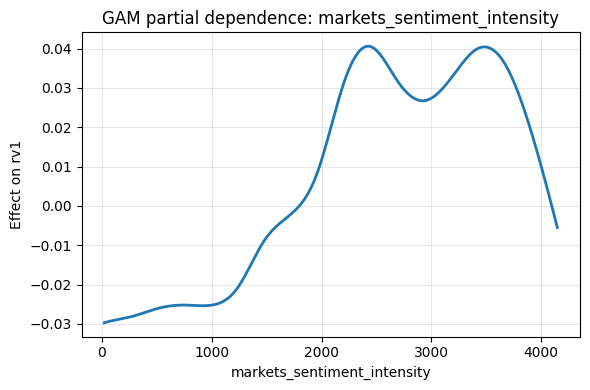

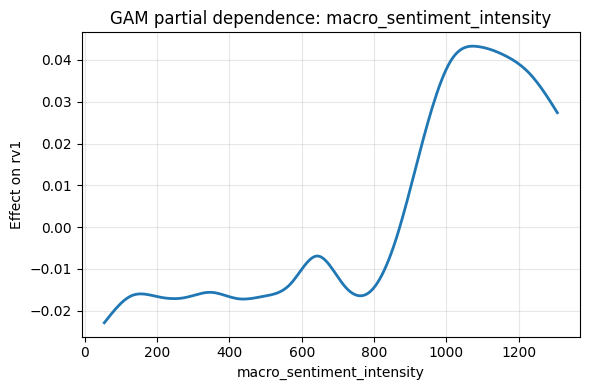

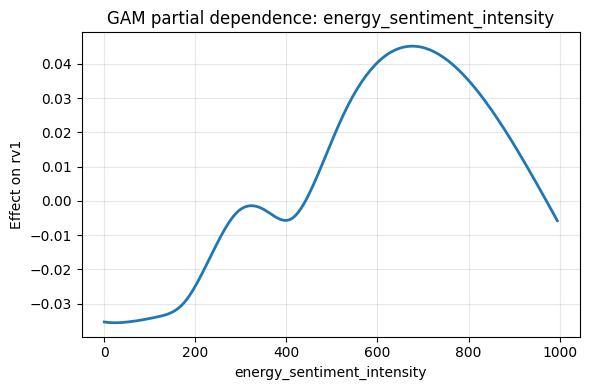

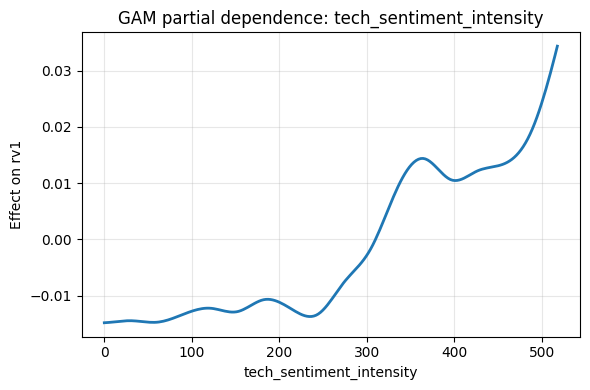

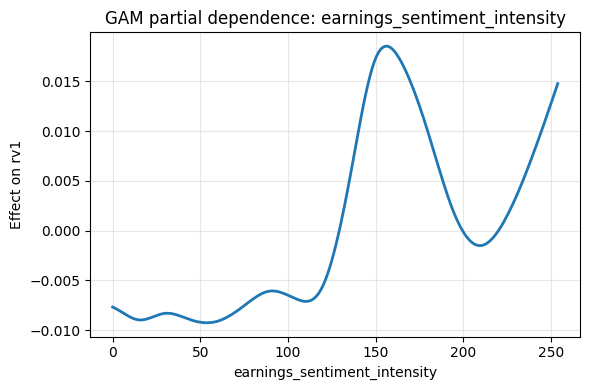

In [13]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

def gam_shape_plot(df, feature, target="rv1", spline=20):
    df_temp = df[[feature, target]].dropna()
    X = df_temp[[feature]].values
    y = df_temp[target].values

    # fit single-spline GAM
    gam = LinearGAM(s(0, n_splines=spline)).fit(X, y)

    # generate grid of x-values
    grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

    # compute partial dependence: term=0 (the only spline)
    pdep = gam.partial_dependence(term=0, X=grid)

    # plot
    plt.figure(figsize=(6, 4))
    plt.plot(grid, pdep, lw=2)
    plt.title(f"GAM partial dependence: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Effect on rv1")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    return gam

for feat in [
    "markets_sentiment_intensity",
    "macro_sentiment_intensity",
    "energy_sentiment_intensity",
    "tech_sentiment_intensity",
    "earnings_sentiment_intensity"
]:
    gam_shape_plot(df_model, feat)


### Partial dependence: nonlinear effects of news on next-day realised volatility

Across all five sentiment intensity variables, the GAM curves show clear nonlinear behaviour rather than simple straight-line effects.

- Markets and macro sentiment stay flat at low levels, then rise sharply only once intensity becomes elevated. This indicates threshold effects rather than proportional scaling.
- Energy and tech sentiment show hump-shaped curves where medium–high intensity produces the strongest lift in RV₁, followed by tapering at extreme values. This suggests diminishing marginal effects.
- Earnings sentiment also shows curvature: little influence at low values, rising impact in the mid-range, then a falloff at the upper tail.

Overall, the partial dependence plots imply smooth, nonlinear, regime-dependent relationships where volatility reacts most strongly once sentiment crosses certain intensity zones rather than increasing linearly.


### **Theme Interaction Effects**

### **Why I Used Sentiment Intensity for Cross-Theme Interaction Analysis**

I used sentiment intensity as the anchor axis for cross-theme interaction surfaces because the exploratory analysis consistently showed that intensity is the strongest and most informative driver of volatility. Across mutual information scores, correlations, and GAM deviance explained, intensity outperformed other feature types. Volatility responds more to the magnitude of sentiment than to its polarity, and partial-dependence tests confirmed that intensity carries most of the nonlinear structure in the data.

Using intensity as the comparison axis also provides a clear question: how do different news domains jointly scale market stress?

With this setup, distinct patterns emerged. Systemic themes showed U-shaped interactions, international themes created diagonal shock structures, and weaker themes displayed mixed behaviour. This validated intensity as the right variable for cross-theme comparisons and highlighted meaningful differences in how each domain influences volatility.


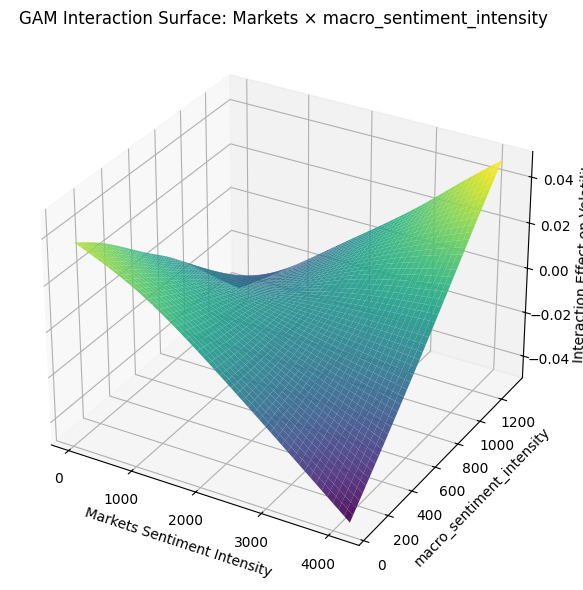

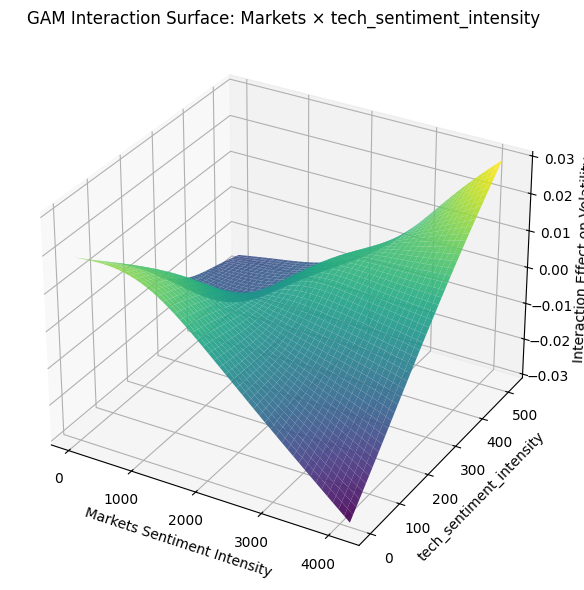

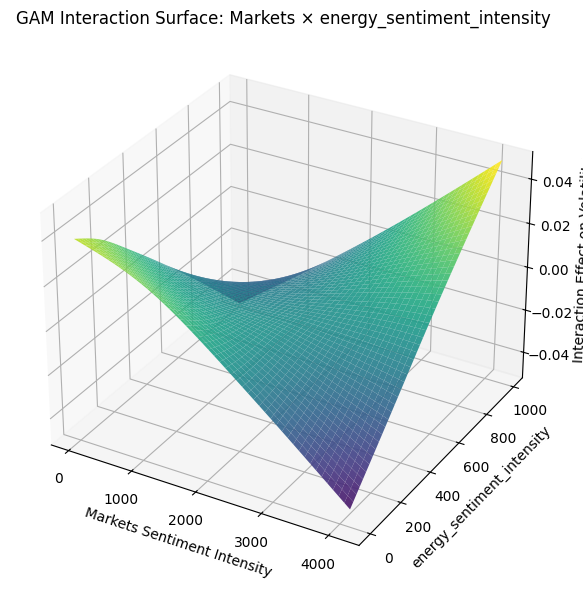

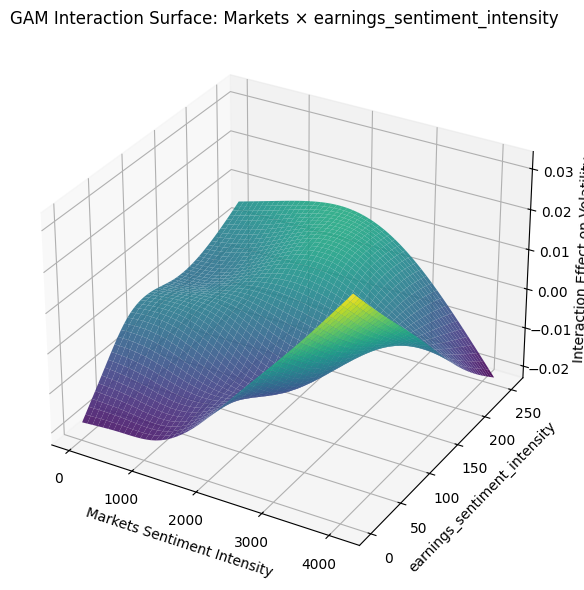

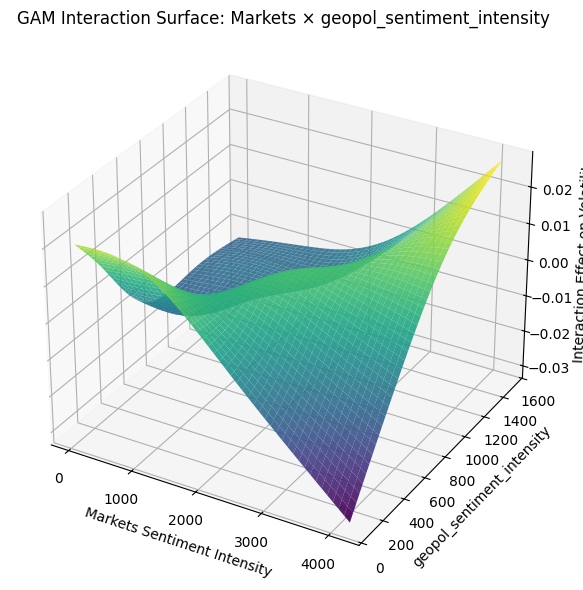

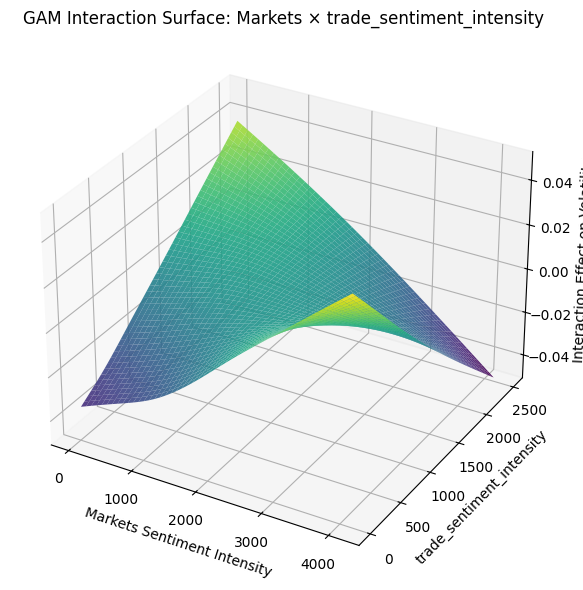

In [14]:
from pygam import LinearGAM, s, te
import numpy as np
import matplotlib.pyplot as plt


target = df_model['rv1']

#market intesnsities
other_intensity_features = [
    'macro_sentiment_intensity',
    'tech_sentiment_intensity',
    'energy_sentiment_intensity',
    'earnings_sentiment_intensity',
    'geopol_sentiment_intensity',
    'trade_sentiment_intensity'
]

def plot_interaction(theme):
    """
    Fit a GAM with:
        f(markets_intensity) +
        f(theme_intensity) +
        f(markets_intensity, theme_intensity)
    and plot the 3D interaction surface.
    """
    X = df_model[['markets_sentiment_intensity', theme]].values
    y = target.values

    gam = LinearGAM(
            s(0) +               # markets smooth
            s(1) +               # theme smooth
            te(0, 1)             # interaction surface
        ).fit(X, y)

    # grid for 3D
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)
    xx1, xx2 = np.meshgrid(x1, x2)

    # interaction-only component
    interaction_pred = gam.partial_dependence(
        term=2,
        X=np.c_[xx1.ravel(), xx2.ravel()]
    ).reshape(xx1.shape)

    # plot
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(xx1, xx2, interaction_pred, cmap='viridis', alpha=0.9)
    ax.set_xlabel('Markets Sentiment Intensity')
    ax.set_ylabel(theme)
    ax.set_zlabel('Interaction Effect on Volatility')

    plt.title(f'GAM Interaction Surface: Markets × {theme}')
    plt.tight_layout()
    plt.show()


# Run themes
for feat in other_intensity_features:
    plot_interaction(feat)


# **Inter Semantic Interaction Effects**


Plotting interaction: markets_sentiment_intensity × markets_uncertainty_ratio


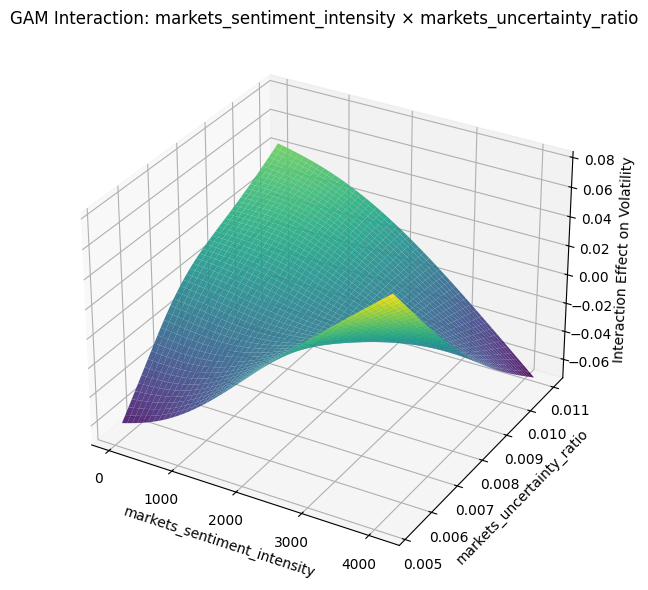


Plotting interaction: markets_sentiment_intensity × markets_sentiment_balance


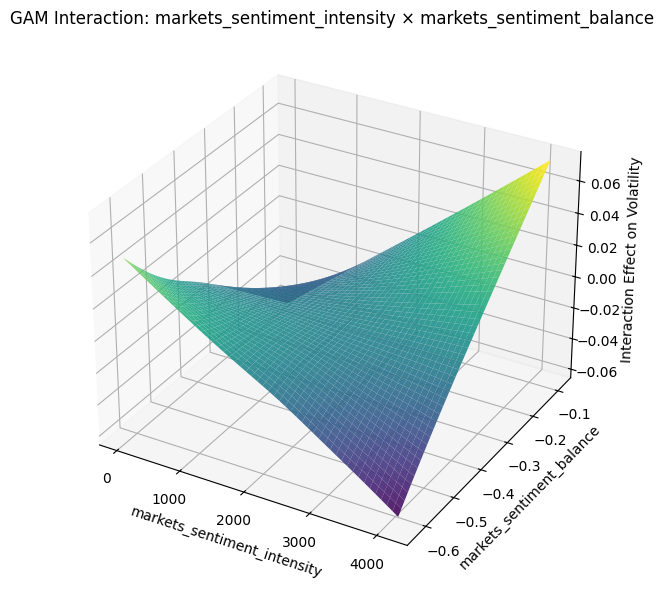


Plotting interaction: markets_sentiment_intensity × markets_activity_share


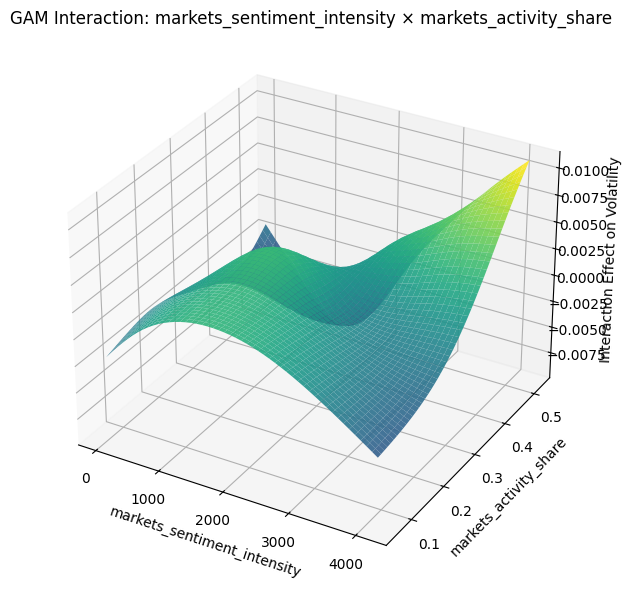


Plotting interaction: markets_sentiment_intensity × markets_sentiment_intensity_lag1


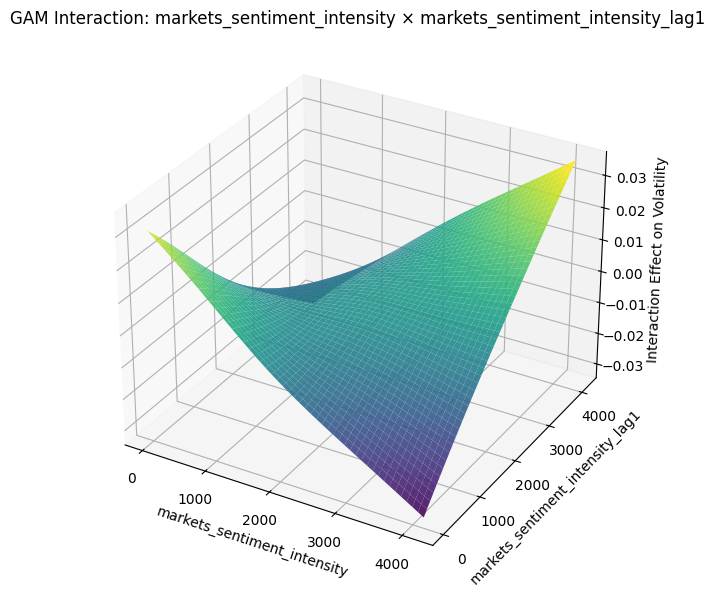

In [15]:
from pygam import LinearGAM, s, te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#feature pairs to test
pairs = [
    ("markets_sentiment_intensity", "markets_uncertainty_ratio"),
    ("markets_sentiment_intensity", "markets_sentiment_balance"),
    ("markets_sentiment_intensity", "markets_activity_share"),
    ("markets_sentiment_intensity", "markets_sentiment_intensity_lag1"),
]

target = "rv1"

#loop 4 pairs
for feat1, feat2 in pairs:
    print(f"\nPlotting interaction: {feat1} × {feat2}")

  
    X = df_model[[feat1, feat2]].values
    y = df_model[target].values

    gam = LinearGAM(
        s(0) + s(1) + te(0, 1)
    ).fit(X, y)

  
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    xx1, xx2 = np.meshgrid(x1, x2)

   
    inter = gam.partial_dependence(
        term=2,
        X=np.c_[xx1.ravel(), xx2.ravel()]
    ).reshape(xx1.shape)


    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")

    ax.plot_surface(xx1, xx2, inter, cmap="viridis", alpha=0.9)
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.set_zlabel("Interaction Effect on Volatility")
    ax.set_title(f"GAM Interaction: {feat1} × {feat2}")

    plt.tight_layout()
    plt.show()


# **Analysis of Interaction Surfaces**

### **Synergy Amplification**

**1. U-Shaped Interaction (Dual-Regime Amplifier)**

Low–Low: Fragile Calm  
When both sentiment intensities are low, even small signals stand out and volatility reacts more than expected.

Mid–Mid: Signal Absorption Zone  
When both intensities sit in the middle, mixed signals offset each other and the volatility response is dampened.

High–High: Stress Amplification  
When both intensities are high, markets price in the possibility of a major event. Volatility increases more than additively and the interaction curve bends upward.


### **Dominance Shock**

**2. Diagonal Amplification with Low–Low Dampening**

The interaction surface shows the following structure:

- Amplification ridge:  
  One intensity is high while the other is low (asymmetric conditions). This creates the tall diagonal ridge.

- Dampening basin:  
  Both intensities are low, producing a negative bowl in the bottom-left (quiet regime).

- Saturation:  
  When both intensities are high, the surface flattens. Additional intensity does not add much new information.


---

## **Potential Features to Engineer from Interaction Analysis**

### **Nonlinear transforms**
- squared intensity terms  (feature space is limited i'd rather use a treemodle that can just take this built in)
- multiplicative interaction terms (uncertainty and activity interacting with intensity)

### **Regime flags for U-shaped themes (macro, energy, tech, earnings)**
- low–low regime  (group into event_news versus primary drivers, is event news low, and markets low intensity? (dont muddy signal of indiviudal themes though it has to be like a max selection where any of the events can be high not like an avg of the four))
- mid–mid regime  (same logic as above, perhaps score like how many events are mid mid)
- high–high regime  (number of events high with market maybe?)

do you want categorical or scores? here that determine e.g the low_lowscore, the mid-mid score, the highhighscore?
probably the former as its more compact

### **Dominance features for diagonal-amplifier themes (geopolitics, trade)**

For geopolitics and trade, the key question is: who dominates the narrative *relative to markets* on that day?

We can encode this as a single categorical feature:
- 0 = markets dominate  
- 1 = geopolitics dominate  
- 2 = trade dominate  
- 3 = neutral (no clear dominance)

### **Saturation and quiet flags**
- both intensities high (saturation, markets and either theme high)  
- both intensities low (quiet regime, markets and both themes low)  

#### **News burst features by driver type**
Captures magnitude × attention:

- primary_burst = primary_intensity * primary_activity  
- amplifier_burst = amplifier_intensity * amplifier_activity  
- dominance_burst = dominance_intensity * dominance_activity  
(+3 features)


#### **Conviction signals**
Captures how confident the market is in the news direction:

i collapse into primary versus events in order to avoid excess feature creation given my limited data

- primary_conviction = primary_activity * 1-primary_uncertainty  
- event_conviction = event_activity * 1-event_uncertainty  
(+2 features)


#### **Sentiment intensity differences**
Captures transitions into and out of event conditions:

- intensity_t − intensity_t1, abs difference, etc.  
(+small set)



# **refined feature set**

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRADING_DAYS = 252
WINDOW = 5
SPIKE_Z = 1.5


def load_market_data(ticker: str, start, end) -> pd.DataFrame:
    df = yf.download(ticker, start=start, end=end, interval="1d")

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns]

    df = (
        df.reset_index()
          .rename(columns={"Date": "date_key"})
          .assign(date_key=lambda x: pd.to_datetime(x["date_key"]))
    )

    rename_map = {}
    for col in df.columns:
        if "Close" in col:  rename_map[col] = "Close"
        if "Open" in col:   rename_map[col] = "Open"
        if "High" in col:   rename_map[col] = "High"
        if "Low" in col:    rename_map[col] = "Low"
        if "Volume" in col: rename_map[col] = "Volume"

    df = df.rename(columns=rename_map)
    return df[["date_key", "Open", "High", "Low", "Close", "Volume"]]

def add_volatility_targets(df_mkt: pd.DataFrame) -> pd.DataFrame:
    df = df_mkt.copy()

    df["ret"] = df["Close"].pct_change()

    # rolling annualized vol
    df["vol"] = df["ret"].rolling(WINDOW).std() * np.sqrt(TRADING_DAYS)
    df["log_vol"] = np.log1p(df["vol"])

    mean_vol = df["vol"].mean()
    sd_vol = df["vol"].std()
    threshold = mean_vol + SPIKE_Z * sd_vol

    df["vol_spike"] = (df["vol"].shift(-1) > threshold).astype(int)

    return df



# 3. MERGE NEWS + MARKET

def merge_news_market(df_news: pd.DataFrame, df_mkt: pd.DataFrame) -> pd.DataFrame:
    merged = (
        df_mkt.merge(df_news, on="date_key", how="left")
              .sort_values("date_key")
              .reset_index(drop=True)
    )

    news_cols = df_news.columns.drop("date_key")
    merged[news_cols] = merged[news_cols].fillna(0)

    merged["covid_dummy"] = (merged["date_key"] >= pd.Timestamp("2020-02-15")).astype(int)

    return merged.dropna(subset=["vol"])


def add_lags(df: pd.DataFrame) -> pd.DataFrame:
    df_l = df.copy()

    market_cols = ["Close", "ret", "vol", "log_vol"]
    intensity_cols = [c for c in df.columns if "sentiment_intensity" in c]
    balance_cols = [c for c in df.columns if "sentiment_balance" in c]

    for col in market_cols:
        df_l[f"{col}_lag1"] = df_l[col].shift(1)
        df_l[f"{col}_lag3"] = df_l[col].shift(3)

    for col in intensity_cols:
        df_l[f"{col}_lag1"] = df_l[col].shift(1)
        df_l[f"{col}_lag3"] = df_l[col].shift(3)

    for col in balance_cols:
        df_l[f"{col}_lag1"] = df_l[col].shift(1)

    return df_l.dropna().reset_index(drop=True)



def add_rv_targets(df: pd.DataFrame) -> pd.DataFrame:
    df_rv = df.copy()

    # absolute return for realized vol
    df_rv["ret_abs"] = df_rv["ret"].abs()

    # RV1, RV3, RV5
    df_rv["rv1"] = df_rv["ret_abs"].shift(-1)
    df_rv["rv3"] = df_rv["ret_abs"].rolling(3).sum().shift(-3)
    df_rv["rv5"] = df_rv["ret_abs"].rolling(5).sum().shift(-5)

    return df_rv.dropna(subset=["rv1", "rv3", "rv5"]).reset_index(drop=True)


def build_full_modelling_df(df_news: pd.DataFrame, ticker: str):
    # 1. Load market data
    start_date = df_news["date_key"].min()
    end_date   = df_news["date_key"].max()

    df_mkt = load_market_data(ticker, start=start_date, end=end_date)

    # 2. Add volatility spike targets
    df_mkt = add_volatility_targets(df_mkt)

    # 3. Merge with news
    df_model = merge_news_market(df_news, df_mkt)

    # 4. Add lags
    df_model = add_lags(df_model)

    # 5. Add RV targets
    df_model = add_rv_targets(df_model)

    return df_model

df_news = load_daily_features()
df_model = build_full_modelling_df(df_news, ticker="SPY")

print(df_model.shape)
df_model.head()



/tmp/ipykernel_329896/3977134898.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed

(1055, 94)


date_key        Open        High         Low       Close     Volume  \
0 2016-01-14  161.125604  164.279255  159.519024  163.148697  240795600   
1 2016-01-15  158.762537  160.454114  157.699983  159.646576  324846400   
2 2016-01-19  161.474113  161.601614  158.277944  159.859024  195244400   
3 2016-01-20  157.283448  159.383055  153.874780  157.810471  286547800   
4 2016-01-21  158.286441  160.547545  156.951868  158.694458  195772900   

        ret       vol   log_vol  vol_spike  ...  \
0  0.016417  0.257970  0.229500          0  ...   
1 -0.021466  0.289553  0.254296          0  ...   
2  0.001331  0.289947  0.254601          0  ...   
3 -0.012815  0.271998  0.240589          0  ...   
4  0.005602  0.238616  0.213994          0  ...   

   markets_sentiment_balance_lag1  macro_sentiment_balance_lag1  \
0                       -0.305777                     -0.341034   
1                       -0.385328                     -0.350042   
2                       -0.475722                     -0.402328   
3                       -0.442973                     -0.434464   
4                       -0.470838                     -0.390184   

   energy_sentiment_balance_lag1  tech_sentiment_balance_lag1  \
0                      -0.434457                    -0.086486   
1                      -0.535316                    -0.077572   
2                      -0.411483                    -0.216524   
3                      -0.447674                    -0.177316   
4                      -0.665000                    -0.161232   

   trade_sentiment_balance_lag1  geopol_sentiment_balance_lag1   ret_abs  \
0                     -0.466398                      -0.561439  0.016417   
1                     -0.551938                      -0.602610  0.021466   
2                     -0.535885                      -0.567021  0.001331   
3                     -0.526899                      -0.572827  0.012815   
4                     -0.584184                      -0.623272  0.005602   

        rv1       rv3       rv5  
0  0.021466  0.035611  0.061729  
1  0.001331  0.019747  0.055380  
2  0.012815  0.038932  0.067692  
3  0.005602  0.041234  0.065761  
4  0.020516  0.049276  0.065369  

[5 rows x 94 columns]

In [54]:
def engineer_interaction_features(df_model: pd.DataFrame) -> pd.DataFrame:
    df = df_model.copy()

    primary_intensity = df[[
        "markets_sentiment_intensity",
        "macro_sentiment_intensity"
    ]].max(axis=1)

    amplifier_intensity = df[[
        "energy_sentiment_intensity",
        "tech_sentiment_intensity",
        "earnings_sentiment_intensity"
    ]].max(axis=1)

    dominance_intensity = df[[
        "geopol_sentiment_intensity",
        "trade_sentiment_intensity"
    ]].max(axis=1)

    primary_activity = df[["markets_activity_share", "macro_activity_share"]].max(axis=1)
    amplifier_activity = df[["energy_activity_share", "tech_activity_share", "earnings_activity_share"]].max(axis=1)
    dominance_activity = df[["geopol_activity_share", "trade_activity_share"]].max(axis=1)

    primary_unc = df[["markets_uncertainty_ratio", "macro_uncertainty_ratio"]].max(axis=1)
    amplifier_unc = df[[
        "energy_uncertainty_ratio",
        "tech_uncertainty_ratio",
        "earnings_uncertainty_ratio",
        "trade_uncertainty_ratio",
        "geopol_uncertainty_ratio"
    ]].max(axis=1)

    def tail_thresholds(s):
        return s.quantile(0.2), s.quantile(0.8)

    p_low, p_high = tail_thresholds(primary_intensity)
    a_low, a_high = tail_thresholds(amplifier_intensity)
    d_low, d_high = tail_thresholds(dominance_intensity)

    df["u_shape_regime"] = np.select(
        [
            (primary_intensity < p_low) & (amplifier_intensity < a_low),
            primary_intensity.between(p_low, p_high) & amplifier_intensity.between(a_low, a_high),
            (primary_intensity > p_high) & (amplifier_intensity > a_high)
        ],
        [0, 1, 2],
        default=1
    )

    df["dominance_regime"] = np.where(
        primary_intensity > dominance_intensity,
        0,
        np.where(
            df["geopol_sentiment_intensity"] > df["trade_sentiment_intensity"],
            1,
            2
        )
    )

    df["saturation_flag"] = (
        (primary_intensity > p_high) &
        (amplifier_intensity > a_high)
    ).astype(int)

    df["quiet_flag"] = (
        (primary_intensity < p_low) &
        (amplifier_intensity < a_low) &
        (dominance_intensity < d_low)
    ).astype(int)

    df["primary_burst"] = primary_intensity * primary_activity
    df["amplifier_burst"] = amplifier_intensity * amplifier_activity
    df["dominance_burst"] = dominance_intensity * dominance_activity

    df["primary_conviction"] = primary_activity * (1 - primary_unc)
    df["amplifier_conviction"] = amplifier_activity * (1 - amplifier_unc)

    df["primary_intensity_diff"] = primary_intensity - primary_intensity.shift(1)
    df["primary_intensity_jump"] = df["primary_intensity_diff"].abs()

    intensity_today_cols = [
        c for c in df.columns
        if "sentiment_intensity" in c and "lag" not in c
    ]

    lagged_intensity_cols = [
        c for c in df.columns
        if ("sentiment_intensity_lag1" in c or "sentiment_intensity_lag3" in c)
    ]

    base_cols = [
        "rv1",
        "vol", "vol_lag1", "vol_lag3",
        "ret", "ret_lag1", "ret_lag3"
    ]

    engineered_cols = [
        "primary_burst", "amplifier_burst", "dominance_burst",
        "primary_conviction", "amplifier_conviction",
        "primary_intensity_diff", "primary_intensity_jump",
        "u_shape_regime", "dominance_regime",
        "saturation_flag", "quiet_flag"
    ]

    final_cols = base_cols + engineered_cols + intensity_today_cols + lagged_intensity_cols

    out = df[final_cols].dropna().reset_index(drop=True)
    out["date_key"] = df_model["date_key"].iloc[-len(out):].values

    return out


In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression

TICKERS = [
    # Broad indices
    "SPY", "QQQ", "DIA", "IWM",

    # Sector ETFs
    "XLF", "XLE", "XLK", "XLY", "XLV", "XLI", "XLC",

    # Individual stocks
    "AAPL", "MSFT", "XOM", "JPM", "TSLA", "NVDA"

    # <3
    "SHEL.L"
]

def compute_mi_for_ticker(ticker, df_news):
    print(f"Processing {ticker}...")

    # Build full DF → engineer features
    df_model = build_full_modelling_df(df_news, ticker=ticker)
    df_final = engineer_interaction_features(df_model)
    
    df = df_final.copy()

    # Prepare X and y
    non_features = ["date_key", "rv1"]
    features = [c for c in df.columns if c not in non_features]

    X = df[features]
    y = df["rv1"]

    # Compute MI
    mi_scores = mutual_info_regression(X, y, random_state=42)
    mi_df = pd.DataFrame({"feature": features, "mi": mi_scores})
    mi_df["ticker"] = ticker
    return mi_df


# Master MI table for all tickers
df_news = load_daily_features()

all_mi = []
for t in TICKERS:
    mi_df = compute_mi_for_ticker(t, df_news)
    all_mi.append(mi_df)

all_mi = pd.concat(all_mi, ignore_index=True)
mi_matrix = all_mi.pivot(index="feature", columns="ticker", values="mi").fillna(0)
mi_matrix.head(20)



[*********************100%***********************]  1 of 1 completed

Processing SPY...


Processing QQQ...


[*********************100%***********************]  1 of 1 completed


Processing DIA...


[*********************100%***********************]  1 of 1 completed


Processing IWM...


[*********************100%***********************]  1 of 1 completed


Processing XLF...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing XLE...



[*********************100%***********************]  1 of 1 completed

Processing XLK...


Processing XLY...


[*********************100%***********************]  1 of 1 completed


Processing XLV...


[*********************100%***********************]  1 of 1 completed


Processing XLI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing XLC...



[*********************100%***********************]  1 of 1 completed

Processing AAPL...


Processing MSFT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing XOM...


Processing JPM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing TSLA...


Processing NVDASHEL.L...


HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: NVDASHEL.L"}}}
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NVDASHEL.L']: YFTzMissingError('possibly delisted; no timezone found')


ValueError: Cannot set a DataFrame with multiple columns to the single column ret

In [42]:
summary = pd.DataFrame({
    "mean_mi": mi_matrix.mean(axis=1),
    "std_mi": mi_matrix.std(axis=1),
    "count_strong": (mi_matrix > 0.03).sum(axis=1),   # strong MI in how many assets?
    "count_weak": (mi_matrix < 0.01).sum(axis=1),     # useless everywhere?
})
summary = summary.sort_values("mean_mi", ascending=False)
summary.head(30)


mean_mi    std_mi  count_strong  \
feature                                                               
markets_sentiment_intensity        0.058856  0.026911            15   
vol_lag1                           0.057010  0.033372            14   
vol                                0.053759  0.028141            14   
primary_burst                      0.050432  0.027984            13   
vol_lag3                           0.049575  0.033012            12   
markets_sentiment_intensity_lag3   0.045662  0.020454            13   
ret_lag1                           0.039572  0.024769            10   
markets_sentiment_intensity_lag1   0.039089  0.031834             9   
ret_lag3                           0.034251  0.028054            10   
macro_sentiment_intensity          0.033474  0.024146             9   
energy_sentiment_intensity         0.032362  0.026785             8   
tech_sentiment_intensity_lag1      0.030677  0.028663             8   
ret                                0.028904  0.022790             9   
tech_sentiment_intensity           0.028079  0.017879             8   
energy_sentiment_intensity_lag1    0.024446  0.019828             8   
u_shape_regime                     0.022353  0.013061             6   
saturation_flag                    0.020895  0.011642             3   
dominance_burst                    0.020631  0.021615             5   
primary_conviction                 0.019006  0.020820             4   
tech_sentiment_intensity_lag3      0.017076  0.017118             4   
geopol_sentiment_intensity_lag1    0.016903  0.017410             6   
earnings_sentiment_intensity_lag3  0.015646  0.017362             5   
earnings_sentiment_intensity_lag1  0.014965  0.021600             2   
primary_intensity_jump             0.013374  0.020908             4   
primary_intensity_diff             0.013019  0.022846             2   
trade_sentiment_intensity          0.012981  0.018242             3   
macro_sentiment_intensity_lag1     0.012653  0.011463             2   
geopol_sentiment_intensity         0.011939  0.015104             4   
amplifier_burst                    0.011937  0.016927             3   
energy_sentiment_intensity_lag3    0.011816  0.013756             1   

                                   count_weak  
feature                                        
markets_sentiment_intensity                 1  
vol_lag1                                    1  
vol                                         1  
primary_burst                               2  
vol_lag3                                    2  
markets_sentiment_intensity_lag3            1  
ret_lag1                                    2  
markets_sentiment_intensity_lag1            4  
ret_lag3                                    4  
macro_sentiment_intensity                   3  
energy_sentiment_intensity                  4  
tech_sentiment_intensity_lag1               6  
ret                                         5  
tech_sentiment_intensity                    3  
energy_sentiment_intensity_lag1             6  
u_shape_regime                              4  
saturation_flag                             2  
dominance_burst                             5  
primary_conviction                          9  
tech_sentiment_intensity_lag3               8  
geopol_sentiment_intensity_lag1             9  
earnings_sentiment_intensity_lag3           9  
earnings_sentiment_intensity_lag1           8  
primary_intensity_jump                     11  
primary_intensity_diff                     10  
trade_sentiment_intensity                  11  
macro_sentiment_intensity_lag1              7  
geopol_sentiment_intensity                 10  
amplifier_burst                            10  
energy_sentiment_intensity_lag3            10

## Cross-Asset Feature Diagnostics

We compute mutual information between each feature and next-day volatility across 16 assets (indices, sectors, and large-cap equities). Aggregating mean MI, variance, and counts of strong/weak appearances allows us to group features into three categories.

---

### **1. Universally Useful Features (keep for all models)**  
These show consistently high predictive value across almost all assets:

- **markets_sentiment_intensity**
- **markets_sentiment_intensity_lag3**
- **vol**, **vol_lag1**, **vol_lag3**
- **primary_burst**

These six features form the stable, cross-asset core of news–volatility predictability.

---

### **2. Sometimes Useful (sector- or regime-specific)**  
These add value in particular asset groups (tech, energy, macro-sensitive sectors) but are not universal:

- **ret_lag1**, **ret_lag3**
- **macro_sentiment_intensity**
- **energy_sentiment_intensity**, **energy_sentiment_intensity_lag1**
- **tech_sentiment_intensity**, **tech_sentiment_intensity_lag1**
- **u_shape_regime**, **saturation_flag**
- **dominance_burst**

Suitable for asset-level models, not universal ones.

---

### **3. Redundant or Non-Predictive (remove)**  
These have low mean MI, high noise, or are dominated by stronger features:

- **primary_conviction**, **amplifier_conviction**, **amplifier_burst**
- **primary_intensity_diff**, **primary_intensity_jump**
- **earnings_sentiment_intensity*** (all lags)
- **trade_sentiment_intensity*** (all lags)
- **geopol_sentiment_intensity*** (all lags)
- **macro_sentiment_intensity_lag1**
- **energy_sentiment_intensity_lag3**

These do not generalise and should be excluded from final modelling.

---

**Summary:**  
A small set of features—market sentiment (today + lag3), volatility lags, and the engineered burst metric—are consistently predictive across the market universe. All other features behave in sector-specific or noisy ways.


In [33]:
def build_reduced_feature_df(df_final: pd.DataFrame) -> pd.DataFrame:
    """
    Reduced modelling DF using:
      - Universal predictive features
      - Sometimes-useful sector/regime-specific features
    """

    universal = [
        "markets_sentiment_intensity",
        "markets_sentiment_intensity_lag3",
        "vol", "vol_lag1", "vol_lag3",
        "primary_burst"
    ]

    sometimes = [
        "ret_lag1", "ret_lag3",
        "macro_sentiment_intensity",
        "energy_sentiment_intensity", "energy_sentiment_intensity_lag1",
        "tech_sentiment_intensity", "tech_sentiment_intensity_lag1",
        "u_shape_regime", "saturation_flag",
        "dominance_burst"
    ]

    # Add target + date
    base = ["rv1", "date_key"]

    # Combine and keep only existing columns
    keep = [c for c in (base + universal + sometimes) if c in df_final.columns]

    df_reduced = df_final[keep].dropna().reset_index(drop=True)

    print("Reduced DF shape:", df_reduced.shape)
    print("Features used:", keep)

    return df_reduced




In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


def optimize_residual_model(df_final, verbose=True):

    df = df_final.copy()
    df["ret_abs"] = df["ret"].abs()
    df["rv1_target"] = df["ret_abs"].shift(-1)
    df = df.dropna(subset=["rv1_target"]).reset_index(drop=True)

    def expanding_binary_extreme(series, q=0.67):
        thresholds = [series.iloc[:i+1].quantile(q) for i in range(len(series))]
        return pd.Series((series >= thresholds).astype(int), index=series.index)

    df["rv1_extreme"] = expanding_binary_extreme(df["rv1_target"], q=0.67)

    market_only = [
        "vol", "vol_lag1", "vol_lag3",
        "ret", "ret_lag1", "ret_lag3"
    ]

    news_only = [
        "markets_sentiment_intensity",
        "markets_sentiment_intensity_lag3",
        "primary_burst",
        "macro_sentiment_intensity",
        "macro_sentiment_intensity_lag1",
        "macro_sentiment_intensity_lag3",
        "energy_sentiment_intensity",
        "energy_sentiment_intensity_lag1",
        "energy_sentiment_intensity_lag3",
        "tech_sentiment_intensity",
        "tech_sentiment_intensity_lag1",
        "tech_sentiment_intensity_lag3",
        "u_shape_regime",
        "dominance_burst"
    ]

    market_only = [f for f in market_only if f in df.columns]
    news_only = [f for f in news_only if f in df.columns]

    cut = int(len(df) * 0.9)

    X_market_train = df.iloc[:cut][market_only].copy()
    X_market_test = df.iloc[cut:][market_only].copy()

    X_news_train = df.iloc[:cut][news_only].copy()
    X_news_test = df.iloc[cut:][news_only].copy()

    y_train = df.iloc[:cut]["rv1_extreme"].copy()
    y_test = df.iloc[cut:]["rv1_extreme"].copy()

    tscv = TimeSeriesSplit(n_splits=5)
    oof_probs = np.zeros(len(y_train))

    scaler_market = StandardScaler()

    for train_idx, val_idx in tscv.split(X_market_train):
        Xtr = X_market_train.iloc[train_idx]
        Xval = X_market_train.iloc[val_idx]
        ytr = y_train.iloc[train_idx]

        s = StandardScaler()
        Xtr_s = s.fit_transform(Xtr)
        Xval_s = s.transform(Xval)

        base = LogisticRegression(max_iter=1000, class_weight="balanced")
        base.fit(Xtr_s, ytr)
        oof_probs[val_idx] = base.predict_proba(Xval_s)[:, 1]

    residuals_train = y_train.values - oof_probs

    scaler_news = StandardScaler()
    X_news_train_scaled = scaler_news.fit_transform(X_news_train)
    X_news_test_scaled = scaler_news.transform(X_news_test)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'min_samples_leaf': [20, 30, 40],
        'max_features': ['sqrt', 'log2']
    }

    rf_base = RandomForestRegressor(random_state=42, min_samples_split=60)

    grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid,
        cv=TimeSeriesSplit(n_splits=3),
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid_search.fit(X_news_train_scaled, residuals_train)
    best_residual_model = grid_search.best_estimator_

    if verbose:
        importances = best_residual_model.feature_importances_
        top = sorted(zip(news_only, importances), key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in top:
            print(feat, imp)

    X_market_train_scaled = scaler_market.fit_transform(X_market_train)
    X_market_test_scaled = scaler_market.transform(X_market_test)

    baseline_final = LogisticRegression(max_iter=1000, class_weight="balanced")
    baseline_final.fit(X_market_train_scaled, y_train)

    baseline_test_probs = baseline_final.predict_proba(X_market_test_scaled)[:, 1]
    residual_test_pred = best_residual_model.predict(X_news_test_scaled)

    alphas = np.linspace(0.1, 1.0, 10)
    alpha_results = []

    for alpha in alphas:
        combined_probs = np.clip(baseline_test_probs + alpha * residual_test_pred, 0, 1)
        combined_pred = (combined_probs > 0.5).astype(int)
        alpha_results.append({
            'alpha': alpha,
            'accuracy': accuracy_score(y_test, combined_pred),
            'f1': f1_score(y_test, combined_pred)
        })

    best_alpha_result = max(alpha_results, key=lambda x: x['f1'])
    best_alpha = best_alpha_result['alpha']

    baseline_test_pred = (baseline_test_probs > 0.5).astype(int)
    combined_probs_best = np.clip(baseline_test_probs + best_alpha * residual_test_pred, 0, 1)
    combined_pred_best = (combined_probs_best > 0.5).astype(int)

    comparison = pd.DataFrame([
        {'Model': 'Baseline', 'Accuracy': accuracy_score(y_test, baseline_test_pred), 'F1': f1_score(y_test, baseline_test_pred)},
        {'Model': f'Residual α={best_alpha:.2f}', 'Accuracy': accuracy_score(y_test, combined_pred_best), 'F1': f1_score(y_test, combined_pred_best)}
    ])

    return comparison, {
        'baseline_model': baseline_final,
        'residual_model': best_residual_model,
        'scaler_market': scaler_market,
        'scaler_news': scaler_news,
        'best_alpha': best_alpha,
        'best_params': grid_search.best_params_,
        'cv_results': pd.DataFrame(grid_search.cv_results_),
        'alpha_results': pd.DataFrame(alpha_results)
    }


df_news = load_daily_features()
df_model = build_full_modelling_df(df_news, ticker="SHEL.L")
df_final = engineer_interaction_features(df_model)

results, models = optimize_residual_model(df_final, verbose=True)

print(models['cv_results'][['params', 'mean_test_score', 'rank_test_score']].head(10))
print(models['alpha_results'])


[*********************100%***********************]  1 of 1 completed


dominance_burst 0.17890747343224944
markets_sentiment_intensity_lag3 0.11635008180438529
energy_sentiment_intensity 0.11484372427472905
tech_sentiment_intensity_lag3 0.10761527723775886
markets_sentiment_intensity 0.08677596882610192
                                              params  mean_test_score  \
0  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.254132   
1  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.255157   
2  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.256463   
3  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.254666   
4  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.255476   
5  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.256603   
6  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.258091   
7  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.257170   
8  {'max_depth': 3, 'max_features': 'sqrt', 'min_...        -0.256855   
9  {'max_depth': 3, 'max_features': 